In [2]:
import numpy as np
import pandas as pd
import glob
import os
from datetime import datetime
import matplotlib.pyplot as plt
import scipy
import sklearn
import math

In [3]:
def match_list(A,B):
    C= set(A).intersection(set(B))
    print(len(set(A)),len(set(B)),len(C))
    #return C

def create_match_list(A,B):
    C = set(A).intersection(set(B))
    #print(len(set(A)),len(set(B)),len(C))
    return list(C)

def icdf(dct):
	'''
		Simple function to compute an inverse cumulative density distribution from 
		a dictionary. 
	'''
	count = np.zeros(max(dct.values())+1)
    

	for k in dct:
		count[dct[k]] = count[dct[k]] + 1
	
	for i in reversed(range(len(count)-1)):
		count[i] = count[i] + count[i+1]
	
	count = count / count[0]

	return count

def compare_app_pat_date(d1,d2):
    d1 = datetime.strptime(d1, "%Y%m%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
   
    if d1> d2:
        return 1
    else: 
        return 0
    
def compare_app_date(d1,d2):
    d1 = datetime.strptime(d1, "%Y%m%d")
    d2 = datetime.strptime(d2, "%Y%m%d")
    
    if d1 > d2:
        return 1
    else: 
        return 0

def days_between_hN(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y%m%d")
    return abs((d2 - d1).days)

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y%m%d")
    d2 = datetime.strptime(d2, "%Y%m%d")
    return abs((d2 - d1).days)

def days_between_h(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

def remove_duplicate(df, column):
    dup = df[df.duplicated()]
    print("duplicates",dup.shape)
    df.drop_duplicates(subset = column, keep = False, inplace = True)
    return df

def remove_duplicates(df):
    dup = df[df.duplicated()]
    print("duplicates",dup.shape)
    df.drop_duplicates(subset = None, keep = False, inplace = True)
    return df

def normalize_year19(A, num):
    X=[0]*(len(num))
    for i in range(0,len(num)):
        A[i] = A[i]/num[i]
        X[i]=2001+i
    return X, A

def no_normalize_year19(A, num):
    X=[0]*(len(num))
    for i in range(0,len(num)):
        X[i]=2001+i
    return X, A

def normalize_team(A, num):
    X=[0]*(len(num))
    for i in range(0,len(num)):
        A[i] = A[i]/num[i]
        X[i]=1+i
    return X, A

def ratio_between_list(A,B):
    X=[0]*(len(A))
    for i in range(0,len(A)):
        X[i] = float(A[i])/B[i]
    return X
        

def Create_Array(Dict_1,Dict_2):
	'''
		Simple function to create arrays from two dictionaries with same project keys. 
	'''
	X = np.zeros(len(Dict_1))
	Y = np.zeros(len(Dict_2))
	i = 0
	for p in Dict_1.keys():
		X[i] = Dict_1[p]
		Y[i] = Dict_2[p] 
		i = i + 1   
	return X,Y 

# check the correlation
def check_correlation(D1, D2):
    size1 = len(D1)
    size2 = len(D2)
    new1 = dict()
    new2 = dict()
    if size1 < size2:
        for i in D1:
            if i in D2:
                new1[i] = D1[i]
                new2[i] = D2[i]
    else:
        for j in D2:
            if j in D1:
                new1[j] = D1[j]
                new2[j] = D2[j]
    X,Y = Create_Array(new1,new2)
    print("size: ", len(new1))
    print("Correlation: ",np.corrcoef(X, Y))
    return X, Y

def statistics(l):
    avg = sum(l)/len(l)
    m = max(l)
    n = min(l)
    return avg, m, n

# Parsed data

In [4]:
def combine_csv_to_df(path):
    all_files = glob.glob(os.path.join(path, "*.csv"))    
    df_from_each_file = (pd.read_csv(f, sep =';') for f in all_files)
    app_all_df   = pd.concat(df_from_each_file, ignore_index=True)
    return app_all_df

In [5]:
def create_combined_appframe(low,high):   
    frames=[]
    for i in range(low,high):
        numb = i
        app_path = "/kellogg/proj/smz6657/parsed_application_data/"+str(numb)+"/app_info/"
        temp_df = combine_csv_to_df(app_path)
        frames.append(temp_df)
    app_par_df = pd.concat(frames)
    return app_par_df

In [6]:
app_par_df = create_combined_appframe(2001,2020) # collecting from 2001-2019

In [7]:
app_par_df.head()

,abstract,app_date,app_id,assignee,assignee_addr,cpc,inventor_addr,inventors,ipc,parent_tree,provisional,pub_country,pub_date,pub_id,title
0,\nImproved methods for durable and regenerable...,20001130,9727819,NaN,NaN,NaN,Davis*CA*US,Gang *Sun,"\nD06M013/35\n,\nD06M013/352\n",US*08713406*19960913*GRANTED*5882357*09102525*...,NaN,NaN,20010405,20010000085,Formaldehyde scavenging in microbiocidal articles
1,\nThe task indicator decals imprinted with cod...,20001204,9729581,NaN,NaN,NaN,San Leandro*CA*US,Jeffrey *Lewis,\nG09F023/00\n,US*09366450*19990803*PENDING**09729581*CIP,US*60095224*19980804,NaN,20010405,20010000086,Task indicator decals for preventive maintenan...
2,\nA card display system of the present inventi...,20001206,9731416,NaN,NaN,NaN,"Plano*TX*US,Allen*TX*US,Addison*TX*US","Mark A.*Harwell,James D.*Hitt,Grant S.*Sandground",\nG09F003/18\n,US*09348104*19990706*PENDING**09731416*DIV,NaN,NaN,20010405,20010000087,Method of and system for displaying cards
3,\nThe subject of the present invention relates...,20001201,9728740,NaN,NaN,NaN,Istanbul**TR,Arif Dondar*Yetisener,\nE04B002/34\n,US*09355868*19990803*PENDING**09728740*DIV,NaN,NaN,20010405,20010000088,Prefabric fiber reinforced cement (GRC) wallpanel
4,"\nIn a vertical form, fill, seal machine that ...",20001201,9726357,NaN,NaN,NaN,Nazareth*PA*US,Barry L.*Pritchard,\nB65B009/00\n,US*09174426*19981019*GRANTED*6182426*09726357*DIV,NaN,NaN,20010405,20010000089,"Vertical form, fill, seal machine and methods"


In [8]:
app_par_df.shape

(5905310, 15)

In [9]:
app_par_df.drop(["provisional","pub_country","assignee","assignee_addr"], axis = 1, inplace = True)

In [10]:
app_par_df.shape

(5905310, 11)

In [11]:
#id-date dictionary
def create_app_filing_date_dict(df):
    '''This makes dictionary with only the patents that are filed after 2000 and before 2019'''
    
    app_id_ls = list(df['app_id'].apply(str))
    app_date_ls = list(df['app_date'].apply(str))
    app_date_dict = dict()
    count =0
    for i in range(0,len(app_id_ls)):
        appid = app_id_ls[i]
        date = app_date_ls[i]
        
        if appid == "11343886": # corner case date is wrong
            date = "20060130"
        if date!= "nan":
            d = datetime.strptime(date, "%Y%m%d").year
            
            if d > 2000 and d < 2019:
                if appid not in app_date_dict:
                    app_date_dict[appid] = date
                    
                else: 
                    if date < app_date_dict[appid]:
                        #if d > 2018:
                        #print(date, " ", app_date_dict[appid])
                        app_date_dict[appid] = date 
                        count+=1
    print("repeatation: ",count)   
    return app_date_dict

In [12]:
app_filing_date_dict = create_app_filing_date_dict(app_par_df)

repeatation:  259


In [13]:
print("length of the date dictionary: ",len(app_filing_date_dict))

length of the date dictionary:  5737076


In [15]:
#id-date dictionary
def create_app_pub_id_dict(df):
    '''This makes dictionary form appid to pubid, ignoring repeatation of appid'''
    
    app_id_ls = list(df['app_id'].apply(str))
    pub_id_ls = list(df['pub_id'].apply(str))
    app_pub_dict = dict()
    count = 0
    for i in range(0,len(app_id_ls)):
        appid = app_id_ls[i]
        pubid = pub_id_ls[i]
        
        if pubid!= "nan":
            app_pub_dict[appid] = pubid
        
    return app_pub_dict

In [16]:
app_pub_id_dict = create_app_pub_id_dict(app_par_df)

In [17]:
print("length of the id dictionary: ",len(app_pub_id_dict))

length of the id dictionary:  5894829


In [18]:
#id-date dictionary
def create_app_pub_date_dict(df):
    '''This makes dictionary with only the patents that are filed after 2000'''
    
    app_id_ls = list(df['app_id'].apply(str))
    pub_date_ls = list(df['pub_date'].apply(str))
    pub_date_dict = dict()
    count =0
    for i in range(0,len(app_id_ls)):
        appid = app_id_ls[i]
        date = pub_date_ls[i]
        count+=1
        if appid == "11343886": # corner case date is wrong
            date = "20060130"
        if date!= "nan":
            d = datetime.strptime(date, "%Y%m%d").year
            
            if d > 2000:
                pub_date_dict[appid] = date
        
    return pub_date_dict

In [19]:
app_pub_date_dict = create_app_pub_date_dict(app_par_df)

In [20]:
print("length of the publication date dictionary: ",len(app_pub_date_dict))

length of the publication date dictionary:  5894829


In [21]:
def count_app_per_year(app_date):
    app_year = [0]*19
    for i in app_date:
        date = app_date[i]
        d = datetime.strptime(date, "%Y%m%d").year
        yr = d-2000
        yr = yr%20
        app_year[yr-1] = app_year[yr-1]+1
    return app_year
        
        
app_filing_date_count = count_app_per_year(app_filing_date_dict)
print(app_filing_date_count)
print(sum(app_filing_date_count))
app_pub_date_count = count_app_per_year(app_pub_date_dict)
print(app_pub_date_count)
print(sum(app_pub_date_count))

[218423, 245597, 292769, 300988, 307403, 323092, 327273, 316028, 295510, 307291, 331544, 353086, 372291, 378970, 378201, 374477, 354142, 259991, 0]
5737076
[56375, 198743, 236710, 267951, 289113, 294162, 299786, 320120, 327599, 332541, 320450, 330797, 345910, 378579, 380668, 379867, 373072, 375386, 387000]
5894829


## PEDS data

In [44]:
peds_app_path = "/kellogg/proj/smz6657/PEDS/parsed_PEDS/app_info/"
df_app_peds = combine_csv_to_df(peds_app_path)

/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


In [45]:
df_app_peds.head()

,app_id,app_date,app_type,app_status,status_date,title,grant_num,grant_date
0,6106383,1980-01-01,Utility,Patented Case,1982-06-22,IONIC HYDROCARBON POLYMERS HAVING IMPROVED ADH...,4321337,1982-03-23
1,6108976,1980-01-02,Utility,Patented Case,1981-07-25,REINFOCED CONTAINER WITH INTEGRAL DIVIDER,4293091,1981-10-06
2,6108980,1980-01-02,Utility,Patented Case,1981-11-24,TYPEWRITER WITH THROAT FOR FRONT LOADING OF SH...,4302116,1981-11-24
3,6108977,1980-01-02,Utility,Patented Case,1981-06-23,EDUCATIONAL TOY,4286952,1981-09-01
4,6108975,1980-01-02,Utility,Patented Case,1982-06-22,COMPOSITE LOUNGE CHAIR STRUTURE,4335475,1982-06-22


In [46]:
df_app_peds.shape

(11860508, 8)

In [47]:
types = ["Utility"]
df_peds_util = df_app_peds[df_app_peds['app_type'].isin(types)]

In [48]:
#id-date dictionary
def create_peds_app_date_dict(df):
    '''This makes dictionary with only the patents that are filed after 2000 and before 2019'''
    
    app_id_ls = list(df['app_id'].apply(str))
    app_date_ls = list(df['app_date'].apply(str))
    app_date_dict = dict()
    count =0
    for i in range(0,len(app_id_ls)):
        appid = app_id_ls[i]
        if appid[0]=="0":
            appid = appid[1:]
        date = app_date_ls[i]
        count+=1
        if date!= "nan" and date!="":
            d = datetime.strptime(date, "%Y-%m-%d").year
            if d > 2000 and d < 2019:
                app_date_dict[appid] = date
        
    return app_date_dict

In [49]:
peds_app_date_dict = create_peds_app_date_dict(df_peds_util)

In [50]:
def count_peds_app_per_year(app_date):
    '''PEDS has data till 2018'''
    app_year = [0]*18
    for i in app_date:
        date = app_date[i]
        d = datetime.strptime(date, "%Y-%m-%d").year
        yr = d-2000
        yr = yr%20
        app_year[yr-1] = app_year[yr-1]+1
    return app_year
        
        
peds_app_per_year = count_peds_app_per_year(peds_app_date_dict)
print(peds_app_per_year)
print(sum(peds_app_per_year))

[269016, 274673, 279074, 295645, 311770, 325874, 335466, 329340, 304124, 324013, 342095, 364594, 384775, 396844, 396460, 395643, 401830, 348335]
6079571


In [ ]:
# make a standard dictionary just with the mathched one.
# use this dictionary throught
# main_app_date


In [51]:
def create_main_app_date_dict(d1,d2):
    app_year = [0]*18
    main_dict = dict()
    for i in d1:
        if i in d2:
            date = d1[i]
            #date2 = d2[i]
            d = datetime.strptime(date, "%Y%m%d").year
            yr = d-2000
            yr = yr%20
            app_year[yr-1] = app_year[yr-1]+1
            main_dict[i] = date
    print(app_year)
    print(sum(app_year))
    return main_dict

In [52]:
main_app_date_dict = create_main_app_date_dict(app_filing_date_dict,peds_app_date_dict)

[217658, 245206, 292457, 300517, 307024, 322626, 326997, 315944, 295490, 307276, 331529, 353065, 372275, 378938, 378169, 370892, 326352, 253201]
5695616


# testing

In [60]:
def match_with_parsed_years(d1,d2,d3):
    app_year = [0]*18
    count =0
    for i in d1:
        if i in d2:
            date = d1[i]
            date2 = d2[i]
            l1 = datetime.strptime(date, "%Y-%m-%d")
            l2 = datetime.strptime(date2, "%Y%m%d")
            d = datetime.strptime(date, "%Y-%m-%d").year
            if l1 == l2:
                    
                    yr = d-2000
                    yr = yr%20
            
                    app_year[yr-1] = app_year[yr-1]+1
            else: 
                if d> 2001:
                    print(i," peds date: ", date, " parsed date", date2, "---", d3[i])
                    count = count+1
                    if count == 30:
                        break
            
    return app_year

print(match_with_parsed_years(peds_app_date_dict, app_filing_date_dict,app_pub_id_dict))
#print(sum(match_with_parsed_years(peds_app_date_dict, app_filing_date_dict)))

9937435  peds date:  2002-01-04  parsed date 20020107 --- 20020153429
10038967  peds date:  2002-01-04  parsed date 20020108 --- 20020090786
10042526  peds date:  2002-01-08  parsed date 20020429 --- 20050031636
10042506  peds date:  2002-01-09  parsed date 20020108 --- 20020090781
10042520  peds date:  2002-01-09  parsed date 20020108 --- 20020110976
10042776  peds date:  2002-01-09  parsed date 20020108 --- 20020154677
10044768  peds date:  2002-01-10  parsed date 20010110 --- 20020175383
10042211  peds date:  2002-01-11  parsed date 20020107 --- 20030170719
10043943  peds date:  2002-01-11  parsed date 20020110 --- 20020062946
10044351  peds date:  2002-01-11  parsed date 20020102 --- 20020053228
10044650  peds date:  2002-01-11  parsed date 20020114 --- 20020164648
10046963  peds date:  2002-01-11  parsed date 20010111 --- 20020144102
10046976  peds date:  2002-01-11  parsed date 20010111 --- 20020091823
10046620  peds date:  2002-01-12  parsed date 20011112 --- 20020093654
1004324

In [146]:
match_list(list(peds_app_date_dict.keys()), list(app_filing_date_dict.keys()))

6905657 5853141 5695625


In [ ]:

[218423, 245597, 292769, 300988, 307403, 323092, 327273, 
 316028, 295510, 307291, 331544, 353086, 372291, 378970, 378201, 374477, 354142, 259991, 116065]
5853141
[217658, 245206, 292457, 300517, 307024, 322626, 326997, 315944,
 295490, 307276, 331529, 353065, 372275, 378938, 378169, 370892, 326352, 253201, 9]
5695625

In [51]:
a = "2016-09-21"
b= "20160921"
x= datetime.strptime(b, '%Y%m%d')
y = datetime.strptime(a, '%Y-%m-%d')
print(x)
print(y)
if(x==y):
    print("match")

2016-09-21 00:00:00
2016-09-21 00:00:00
match


In [31]:
def match_with_parsed_years1(d1,d2):
    app_year = [0]*19
    
    for i in d1:
        if i in d2:
            date = d1[i]
            date2 = d2[i]
            d = datetime.strptime(date, "%Y%m%d").year
            yr = d-2000
            yr = yr%20
            if yr == 19:
                print (date, " ", date2)
            app_year[yr-1] = app_year[yr-1]+1
            
    return app_year

In [32]:
print(match_with_parsed_years1(app_filing_date_dict,peds_app_date_dict))
print(sum(match_with_parsed_years1(app_filing_date_dict,peds_app_date_dict)))

20190311   2018-12-21
20190307   2018-10-17
20190225   2018-11-13
20190212   2018-11-19
20190118   2018-11-02
20190116   2018-10-16
20190215   2018-11-27
20190201   2018-06-20
20190408   2018-08-21
[217658, 245206, 292457, 300517, 307024, 322626, 326997, 315944, 295490, 307276, 331529, 353065, 372275, 378938, 378169, 370892, 326352, 253201, 9]
20190311   2018-12-21
20190307   2018-10-17
20190225   2018-11-13
20190212   2018-11-19
20190118   2018-11-02
20190116   2018-10-16
20190215   2018-11-27
20190201   2018-06-20
20190408   2018-08-21
5695625


# Computing status

In [57]:
def compute_peds_disposal_dict(df_app):
    app_date_dict = create_peds_app_date_dict(df_app)
    
    app_id_ls = list(df_app['app_id'].apply(str))
    #sub_matter_ls = list(df_app['invention_subject_matter'].apply(str))
    app_status = list(df_app['app_status'].apply(str))
    app_status_date = list(df_app['status_date'].apply(str))
    app_grant_num = list(df_app['grant_num'].apply(str))
    
    app_status_dict = dict()
    app_status_date_dict = dict()
    stat_no_pat = 0
    stat_pat =0
    print("total: ",len(app_id_ls))
    print("checking for repeatation:", len(set(app_id_ls)))
    for i in range(0, len(app_id_ls)):
        appid = app_id_ls[i]
        if appid[0]=="0":
            appid = appid[1:]
        kind = app_status[i]
        date = app_status_date[i]
        gr_num = app_grant_num[i]
        
        if appid in app_date_dict:
            
            if date!="nan":

                app_status_date_dict[appid] = date
            
            if gr_num!="" and gr_num!='nan':
                
                app_status_dict[appid] = 'ISS'
                
                if 'Patented' not in kind:
                    stat_no_pat=stat_no_pat+1
                    #print(gr_num)
                else:
                    stat_pat = stat_pat+1
            else:
                if 'Abandoned' in kind:
                     app_status_dict[appid] = 'ABN'

                elif 'ABANDONED' in kind:
                    app_status_dict[appid] = 'ABN'

                else:
                    app_status_dict[appid] = 'PEND'
                    
    print(stat_pat,"  patented but not in status: ",stat_no_pat)
                    
    return app_status_dict, app_status_date_dict


peds_status_dict, peds_status_date_dict= compute_peds_disposal_dict(df_peds_util)

total:  8968837
checking for repeatation: 8968837
3089477   patented but not in status:  787459


In [ ]:
# we have dictionary of dates of application.
# we have the status from the peds data.

## Inventors

In [30]:
df_app_inv =app_par_df[["app_id","app_date","inventors","pub_date"]]

In [31]:
df_app_inv.head()

,app_id,app_date,inventors,pub_date
0,9727819,20001130,Gang *Sun,20010405
1,9729581,20001204,Jeffrey *Lewis,20010405
2,9731416,20001206,"Mark A.*Harwell,James D.*Hitt,Grant S.*Sandground",20010405
3,9728740,20001201,Arif Dondar*Yetisener,20010405
4,9726357,20001201,Barry L.*Pritchard,20010405


In [32]:
df_app_inv.shape

(5905310, 4)

In [33]:
def create_app_inventor_filing_dict(main_app_date_dict,df):
    
    #app_filing_date_dict = create_app_filing_date_dict(app_par_df)
    
    app_id_ls = list(df['app_id'].apply(str))
    inv_ls = list(df['inventors'].apply(str))
    
    #mismatch = rank_check(app_inv_rank_dict)
    app_num_inv_dict = dict()
    
    
    #app_id_ls = list(app_date_dict.keys())
    
    for i in range(0, len(app_id_ls)):
        appid = app_id_ls[i]
        inv = inv_ls[i]
        if appid in main_app_date_dict: 
        
            if inv!="" and inv!="nan":
                
                num_inv = len(inv.split(","))
                app_num_inv_dict[appid] = num_inv
        
    return app_num_inv_dict

maximum team size 133
Number of unique applications: 5695610


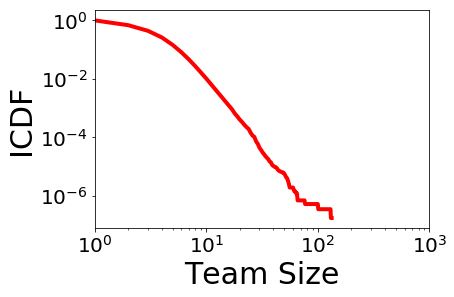

In [34]:
def plot_team_per_app_icdf(count):
    plt.clf()
    ax = plt.subplot(111)
    ax.loglog(range(len(count)), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('Team Size', fontsize=30)
    ax.tick_params(labelsize=20)
    ax.set_xlim(1,1000)
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
    
#Computing ICDF
app_num_inv_dict = create_app_inventor_filing_dict(main_app_date_dict,df_app_inv)
print("maximum team size", max(app_num_inv_dict.values()))
print("Number of unique applications:", len(app_num_inv_dict.keys()))
#print("Number of total claims:", len(pat_claim_dict.keys()))

count = icdf(app_num_inv_dict)
    
plot_team_per_app_icdf(count)

In [35]:
def compute_app_inventor_filing_years(df,main_app_date_dict,peds_status_dict):
    
    #app_filing_date_dict = create_app_filing_date_dict(app_par_df)
    app_num_inv_dict = create_app_inventor_filing_dict(main_app_date_dict,df)
    
    iss_inv_year = [0]*18
    abn_inv_year = [0]*18
    num_abn = [0]*18
    num_iss = [0]*18
    
    iss_inv_dict = dict()
    abn_inv_dict = dict()
    
    for i in app_num_inv_dict:
        
        appid = i
        
        if appid in peds_status_dict: 
        #if appid not in mismatch: 
            d = datetime.strptime(main_app_date_dict[appid], "%Y%m%d").year
            d = d - 2000
            yr = d%20 # we have till 2018
            
            
            status = peds_status_dict[appid]
            
            if status == "ISS":
                num_inv = app_num_inv_dict[i]
                iss_inv_year[yr-1] = iss_inv_year[yr-1] + num_inv
                num_iss[yr-1]=num_iss[yr-1]+1
                iss_inv_dict[i] = num_inv
                
            if status == "ABN":
            
                num_inv = app_num_inv_dict[i]
                abn_inv_year[yr-1] = abn_inv_year[yr-1] + num_inv
                num_abn[yr-1]=num_abn[yr-1]+1
                abn_inv_dict[i] = num_inv
                
        #else: #checking if the numbers are very close
            #for l in peds_status_dict:
                #if appid in l:
                    #print("in parsed data", appid, " ", l)
                 
        
    return iss_inv_dict, abn_inv_dict, iss_inv_year, abn_inv_year, num_iss, num_abn 

In [36]:
iss_inv_dict, abn_inv_dict, iss_inv_year, abn_inv_year, num_iss, num_abn = compute_app_inventor_filing_years(df_app_inv,main_app_date_dict,peds_status_dict)

maximum team size in ISSUED: 133
Number of unique ISSUED applications: 3529578


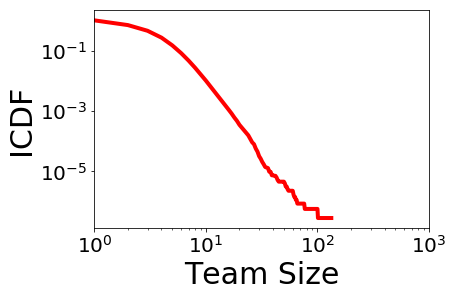

In [37]:
def plot_team_per_issapp_icdf(count):
    plt.clf()
    ax = plt.subplot(111)
    ax.loglog(range(len(count)), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('Team Size', fontsize=30)
    ax.tick_params(labelsize=20)
    ax.set_xlim(1,1000)
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
    
#Computing ICDF
print("maximum team size in ISSUED:", max(iss_inv_dict.values()))
print("Number of unique ISSUED applications:", len(iss_inv_dict.keys()))

count = icdf(iss_inv_dict)
plot_team_per_issapp_icdf(count)

maximum team size in abandoned: 65
Number of unique abandoned applications: 1594993


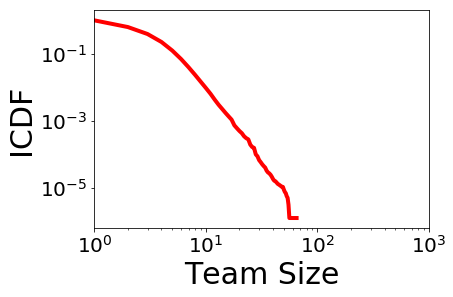

In [38]:
def plot_team_per_abnapp_icdf(count):
    plt.clf()
    ax = plt.subplot(111)
    ax.loglog(range(len(count)), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('Team Size', fontsize=30)
    ax.tick_params(labelsize=20)
    ax.set_xlim(1,1000)
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
    
#Computing ICDF
print("maximum team size in abandoned:", max(abn_inv_dict.values()))
print("Number of unique abandoned applications:", len(abn_inv_dict.keys()))

count = icdf(abn_inv_dict)
plot_team_per_abnapp_icdf(count)

In [39]:
print(iss_inv_year)
print(abn_inv_year)
print(num_iss)
print(sum(num_iss))
print(num_abn)
print(sum(num_abn))

[392174, 443238, 505584, 499831, 493071, 516958, 547867, 557388, 543776, 583730, 636930, 692608, 734666, 741783, 714669, 605484, 416162, 141099]
[150452, 190871, 244165, 270033, 293600, 317639, 312322, 280092, 247608, 252070, 270291, 272722, 281382, 257380, 204586, 140623, 70239, 17276]
[155155, 171297, 194276, 190798, 187151, 194294, 202374, 204590, 198008, 208655, 225609, 243852, 255144, 256675, 244583, 206433, 142083, 48601]
3529578
[62252, 73656, 97956, 109463, 119587, 127941, 124047, 110591, 96415, 97032, 103098, 103856, 106051, 97319, 78182, 53974, 27201, 6372]
1594993


In [40]:
num = [a_i + b_i for a_i, b_i in zip(num_iss,num_abn)]
print(num)
print(sum(num))

[217407, 244953, 292232, 300261, 306738, 322235, 326421, 315181, 294423, 305687, 328707, 347708, 361195, 353994, 322765, 260407, 169284, 54973]
5124571


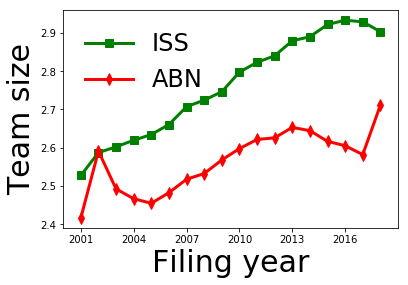

In [41]:
def plot_app_inv_per_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='ABN')
    ax.set_ylabel('Team size', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_inv_year, num_iss)
X, Y2 = normalize_year19(abn_inv_year, num_abn)
plot_app_inv_per_filing_year(X,Y1,Y2)

In [71]:
# application

In [42]:
iss_inv_year1 = [392161, 443240, 505539, 499813, 493052, 516984, 547895, 557398, 543783, 583739, 636930, 692606, 734676, 741786, 714669, 605486, 416162, 141099]
abn_inv_year1 = [150452, 190871, 244165, 270033, 293600, 317639, 312322, 280092, 247608, 252070, 270291, 272722, 281382, 257380, 204586, 140623, 70239, 17276]
Y_plus = [a_i + b_i for a_i, b_i in zip(iss_inv_year1,abn_inv_year1)]
num = [a_i + b_i for a_i, b_i in zip(num_iss,num_abn)]

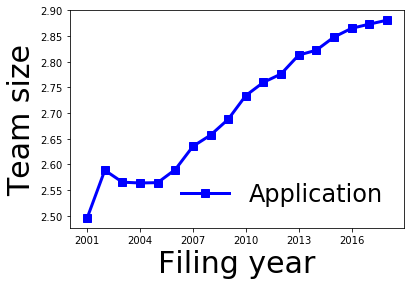

In [43]:
def plot_app_invall_per_filing_year(X,Y):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y, '-bs', linewidth=3, markersize=8, label='Application')
    #plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='ABN')
    ax.set_ylabel('Team size', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y = normalize_year19(Y_plus, num)
plot_app_invall_per_filing_year(X,Y)

In [44]:
#difference
iss_inv_year1 = [392161, 443240, 505539, 499813, 493052, 516984, 547895, 557398, 543783, 583739, 636930, 692606, 734676, 741786, 714669, 605486, 416162, 141099]
abn_inv_year1 = [150452, 190871, 244165, 270033, 293600, 317639, 312322, 280092, 247608, 252070, 270291, 272722, 281382, 257380, 204586, 140623, 70239, 17276]
X, Y1 = normalize_year19(iss_inv_year1,num_iss)
X, Y2 = normalize_year19(abn_inv_year1,num_abn)
Y_diff = [a_i - b_i for a_i, b_i in zip(Y1,Y2)]

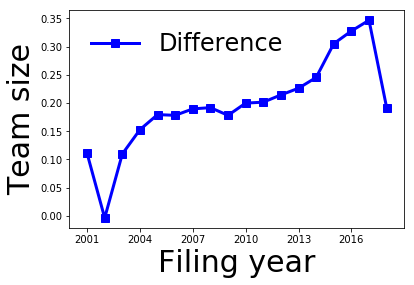

In [45]:
def plot_app_invdiff_per_filing_year(X,Y):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y, '-bs', linewidth=3, markersize=8, label='Difference')
    ax.set_ylabel('Team size', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y = no_normalize_year19(Y_diff,num_iss)
plot_app_invdiff_per_filing_year(X,Y)

## CPC classes

In [82]:
# important dictionaries
# main_app_date_dict, 
#app_num_inv_dict, iss_inv_dict, abn_inv_dict
# peds_status_dict, peds_status_date_dict

In [35]:
app_par_df.head()

,abstract,app_date,app_id,cpc,inventor_addr,inventors,ipc,parent_tree,pub_date,pub_id,title
0,\nImproved methods for durable and regenerable...,20001130,9727819,NaN,Davis*CA*US,Gang *Sun,"\nD06M013/35\n,\nD06M013/352\n",US*08713406*19960913*GRANTED*5882357*09102525*...,20010405,20010000085,Formaldehyde scavenging in microbiocidal articles
1,\nThe task indicator decals imprinted with cod...,20001204,9729581,NaN,San Leandro*CA*US,Jeffrey *Lewis,\nG09F023/00\n,US*09366450*19990803*PENDING**09729581*CIP,20010405,20010000086,Task indicator decals for preventive maintenan...
2,\nA card display system of the present inventi...,20001206,9731416,NaN,"Plano*TX*US,Allen*TX*US,Addison*TX*US","Mark A.*Harwell,James D.*Hitt,Grant S.*Sandground",\nG09F003/18\n,US*09348104*19990706*PENDING**09731416*DIV,20010405,20010000087,Method of and system for displaying cards
3,\nThe subject of the present invention relates...,20001201,9728740,NaN,Istanbul**TR,Arif Dondar*Yetisener,\nE04B002/34\n,US*09355868*19990803*PENDING**09728740*DIV,20010405,20010000088,Prefabric fiber reinforced cement (GRC) wallpanel
4,"\nIn a vertical form, fill, seal machine that ...",20001201,9726357,NaN,Nazareth*PA*US,Barry L.*Pritchard,\nB65B009/00\n,US*09174426*19981019*GRANTED*6182426*09726357*DIV,20010405,20010000089,"Vertical form, fill, seal machine and methods"


In [36]:
df_app_cpc = app_par_df[["app_id","cpc","ipc"]]

In [37]:
df_app_cpc.head()

,app_id,cpc,ipc
0,9727819,NaN,"\nD06M013/35\n,\nD06M013/352\n"
1,9729581,NaN,\nG09F023/00\n
2,9731416,NaN,\nG09F003/18\n
3,9728740,NaN,\nE04B002/34\n
4,9726357,NaN,\nB65B009/00\n


In [38]:
df_app_cpc.isnull().sum()

app_id          0
cpc       3458324
ipc       1899867
dtype: int64

In [110]:
app_id_ls = list(df_app_cpc['app_id'].apply(str))
cpc_ls = list(df_app_cpc['cpc'].apply(str))
count = 0
for i in range(0, len(app_id_ls)):
    cpc = cpc_ls[i]
    if cpc!="" and cpc!="nan":
        print(cpc)
        count = count+1
        if count > 500:
            break

A-63-B-71-141
A-41-D-13-081
A-41-D-13-0015
A-41-D-15-005
A-41-D-13-0002
A-41-D-3-04
A-41-D-1-04
A-41-D-19-015
A-45-D-44-00
C-08-L-9-02,A-41-D-19-0055
A-42-C-5-00,H-05-K-5-0086,H-05-K-5-023,H-05-K-5-03
A-43-B-17-16
A-43-B-23-24
A-41-F-19-00
A-41-B-9-02
A-62-B-17-003,B-32-B-5-26,B-32-B-7-14
A-47-K-13-12
E-03-C-1-304
E-03-D-1-36,E-03-D-1-33
E-03-D-1-14,F-16-M-13-02
A-47-K-11-04
A-47-K-3-06
A-61-G-7-109
A-47-D-9-00
A-47-D-13-063,A-47-D-13-06
A-47-G-9-06
A-61-G-7-057
A-47-G-9-0246
A-47-G-9-04
A-47-D-7-007
A-47-C-7-62
A-47-C-20-00
A-47-D-13-083
A-47-C-27-081,F-16-K-15-185
A-47-C-20-00
C-11-D-3-3792,C-11-D-3-3776,C-11-D-3-0021,C-11-D-3-0036
D-06-F-23-02
D-06-F-39-008
D-06-F-39-008
D-06-F-39-008
D-06-F-43-02
C-14-C-3-26,C-14-C-3-28
C-09-D-103-00
C-12-N-15-8237,D-06-P-3-66
A-43-D-8-00
E-01-D-1-00,E-01-D-21-00
B-63-B-59-02,B-63-B-27-143
A-61-C-17-16
B-08-B-1-001
F-41-A-29-02
A-47-K-7-00
A-46-B-9-04
A-61-C-15-00,A-46-D-3-00
A-46-B-9-04
A-47-K-7-02
B-60-S-1-38
A-47-L-9-19
A-47-L-9-14
A-47-L-9-0477

In [39]:
def create_app_sec_sub_gr_dict(main_app_date_dict,df):
    
    #app_filing_date_dict = create_app_filing_date_dict(app_par_df)
    
    app_id_ls = list(df['app_id'].apply(str))
    cpc_ls = list(df['cpc'].apply(str))
    ipc_ls = list(df['ipc'].apply(str))
    
    sec_pat_dict = dict()
    sub_pat_dict = dict()
    gr_pat_dict = dict()
    
    pat_sub_dict = dict()
    pat_sec_dict = dict()
    pat_gr_dict = dict ()
    
    count = 0
    print("main dictionary: ",len(main_app_date_dict))
    for i in range(0, len(app_id_ls)):
    #for i in range(0, 1000):
        pid = app_id_ls[i]
        cpc = cpc_ls[i]
        ipc = ipc_ls[i]
        if pid in main_app_date_dict: 
        
            if cpc!="" and cpc!="nan":
                
                lscpc = cpc.split(",")
                #print("list-cpc:", lscpc)
                for el in lscpc:
                    
                    secs = el.split("-")
                    sec = secs[0]
                    sub = sec+ secs[1]
                    gr =  sub + secs[2]
                   
                    if sec not in sec_pat_dict:
                        sec_pat_dict[sec] = [pid]
                    else:
                        sec_pat_dict[sec].append(pid)

                    if sub not in sub_pat_dict:
                        sub_pat_dict[sub] = [pid]
                    else:
                        sub_pat_dict[sub].append(pid)

                    if gr not in gr_pat_dict:
                        gr_pat_dict[gr] = [pid]
                    else:
                        gr_pat_dict[gr].append(pid)

                    if pid not in pat_sec_dict:
                        pat_sec_dict[pid] = [sec]
                    else:
                        if sec not in pat_sec_dict[pid]:
                            pat_sec_dict[pid].append(sec)

                    if pid not in pat_sub_dict:
                        pat_sub_dict[pid] = [sub]
                    else:
                        if sub not in pat_sub_dict[pid]:
                            pat_sub_dict[pid].append(sub)

                    if pid not in pat_gr_dict:
                        pat_gr_dict[pid] = [gr]
                    else:
                        if gr not in pat_gr_dict[pid]:
                            pat_gr_dict[pid].append(gr)
                    
                    
                
            
            elif ipc!="" and ipc!="nan":
                #print("IPC", ipc)
                ipc = ipc.replace('\n','')
                #print("IPC", ipc)
                lscpc = ipc.split(",")
                #print("list-ipc:", lscpc)
                
                for el in lscpc:
                    
                    if "-" in el:
                        secs = el.split("-")
                        sec = secs[0]
                        sub = sec+ secs[1]
                        gr =  sub + secs[2]
                        
                    else:
                    
                        sec = el[0]
                        sub = sec +el[1]+el[2]
                        gr =  sub +el[3]
                    #print(sec)
                    #print(sub)
                    #print(gr)
                    #print("----")
                    
                    if sec not in sec_pat_dict:
                        sec_pat_dict[sec] = [pid]
                    else:
                        sec_pat_dict[sec].append(pid)

                    if sub not in sub_pat_dict:
                        sub_pat_dict[sub] = [pid]
                    else:
                        sub_pat_dict[sub].append(pid)

                    if gr not in gr_pat_dict:
                        gr_pat_dict[gr] = [pid]
                    else:
                        gr_pat_dict[gr].append(pid)

                    if pid not in pat_sec_dict:
                        pat_sec_dict[pid] = [sec]
                    else:
                        if sec not in pat_sec_dict[pid]:
                            pat_sec_dict[pid].append(sec)

                    if pid not in pat_sub_dict:
                        pat_sub_dict[pid] = [sub]
                    else:
                        if sub not in pat_sub_dict[pid]:
                            pat_sub_dict[pid].append(sub)

                    if pid not in pat_gr_dict:
                        pat_gr_dict[pid] = [gr]
                    else:
                        if gr not in pat_gr_dict[pid]:
                            pat_gr_dict[pid].append(gr)
                
            else:
                #print("PROBLEM")
                count = count+1
                continue
    print("Problem: ", count)
    return sec_pat_dict, sub_pat_dict, gr_pat_dict, pat_sec_dict, pat_sub_dict, pat_gr_dict

In [40]:
sec_app_dict, sub_app_dict, group_app_dict, app_sec_dict, app_sub_dict, app_gr_dict = create_app_sec_sub_gr_dict(main_app_date_dict,df_app_cpc)

main dictionary:  5695616
Problem:  122


## Fields and impact

In [41]:
def compute_iss_per_sec_years(main_app_date_dict,sec_app_dict):
    
    iss_A_year=[0]*18
    iss_B_year=[0]*18
    iss_C_year=[0]*18
    iss_D_year=[0]*18
    iss_E_year=[0]*18
    iss_F_year=[0]*18
    iss_G_year=[0]*18
    iss_H_year=[0]*18
    iss_Y_year=[0]*18
    
    abn_A_year=[0]*18
    abn_B_year=[0]*18
    abn_C_year=[0]*18
    abn_D_year=[0]*18
    abn_E_year=[0]*18
    abn_F_year=[0]*18
    abn_G_year=[0]*18
    abn_H_year=[0]*18
    abn_Y_year=[0]*18
    
    for i in sec_app_dict:
        
        if i == "A":
            
            for app in sec_app_dict[i]:
                if app in main_app_date_dict:
                    if app in peds_status_dict: 
                        
                        d = datetime.strptime(main_app_date_dict[app], "%Y%m%d").year
                        d = d-2000
                        yr = d%20 # we have till 2018
            
                        status = peds_status_dict[app]
                
                        if status == "ISS":
                            iss_A_year[yr-1] = iss_A_year[yr-1]+1
                        if status == "ABN":
                            abn_A_year[yr-1] = abn_A_year[yr-1]+1
        if i =="B":
            
            for app in sec_app_dict[i]:
                if app in main_app_date_dict:
                    if app in peds_status_dict: 
                        
                        d = datetime.strptime(main_app_date_dict[app], "%Y%m%d").year
                        d = d-2000
                        yr = d%20 # we have till 2018
            
                        status = peds_status_dict[app]
                
                        if status == "ISS":
                            iss_B_year[yr-1] = iss_B_year[yr-1]+1
                        if status == "ABN":
                            abn_B_year[yr-1] = abn_B_year[yr-1]+1
        
        if i =="C":
            
            for app in sec_app_dict[i]:
                if app in main_app_date_dict:
                    if app in peds_status_dict: 
                        
                        d = datetime.strptime(main_app_date_dict[app], "%Y%m%d").year
                        d = d-2000
                        yr = d%20 # we have till 2018
            
                        status = peds_status_dict[app]
                
                        if status == "ISS":
                            iss_C_year[yr-1] = iss_C_year[yr-1]+1
                        if status == "ABN":
                            abn_C_year[yr-1] = abn_C_year[yr-1]+1
                            
                            
        if i =="D":
            
            for app in sec_app_dict[i]:
                if app in main_app_date_dict:
                    if app in peds_status_dict: 
                        
                        d = datetime.strptime(main_app_date_dict[app], "%Y%m%d").year
                        d = d-2000
                        yr = d%20 # we have till 2018
            
                        status = peds_status_dict[app]
                
                        if status == "ISS":
                            iss_D_year[yr-1] = iss_D_year[yr-1]+1
                        if status == "ABN":
                            abn_D_year[yr-1] = abn_D_year[yr-1]+1
                            
        if i =="E":
            
            for app in sec_app_dict[i]:
                if app in main_app_date_dict:
                    if app in peds_status_dict: 
                        
                        d = datetime.strptime(main_app_date_dict[app], "%Y%m%d").year
                        d = d-2000
                        yr = d%20 # we have till 2018
            
                        status = peds_status_dict[app]
                
                        if status == "ISS":
                            iss_E_year[yr-1] = iss_E_year[yr-1]+1
                        if status == "ABN":
                            abn_E_year[yr-1] = abn_E_year[yr-1]+1
                            
        if i =="F":
            
            for app in sec_app_dict[i]:
                if app in main_app_date_dict:
                    if app in peds_status_dict: 
                        
                        d = datetime.strptime(main_app_date_dict[app], "%Y%m%d").year
                        d = d-2000
                        yr = d%20 # we have till 2018
            
                        status = peds_status_dict[app]
                
                        if status == "ISS":
                            iss_F_year[yr-1] = iss_F_year[yr-1]+1
                        if status == "ABN":
                            abn_F_year[yr-1] = abn_F_year[yr-1]+1
                            
        if i =="G":
            
            for app in sec_app_dict[i]:
                if app in main_app_date_dict:
                    if app in peds_status_dict: 
                        
                        d = datetime.strptime(main_app_date_dict[app], "%Y%m%d").year
                        d = d-2000
                        yr = d%20 # we have till 2018
            
                        status = peds_status_dict[app]
                
                        if status == "ISS":
                            iss_G_year[yr-1] = iss_G_year[yr-1]+1
                        if status == "ABN":
                            abn_G_year[yr-1] = abn_G_year[yr-1]+1
                            
                            
        if i =="H":
            
            for app in sec_app_dict[i]:
                if app in main_app_date_dict:
                    if app in peds_status_dict: 
                        
                        d = datetime.strptime(main_app_date_dict[app], "%Y%m%d").year
                        d = d-2000
                        yr = d%20 # we have till 2018
            
                        status = peds_status_dict[app]
                
                        if status == "ISS":
                            iss_H_year[yr-1] = iss_H_year[yr-1]+1
                        if status == "ABN":
                            abn_H_year[yr-1] = abn_H_year[yr-1]+1
                            
        if i =="Y":
            
            for app in sec_app_dict[i]:
                if app in main_app_date_dict:
                    if app in peds_status_dict: 
                        
                        d = datetime.strptime(main_app_date_dict[app], "%Y%m%d").year
                        d = d-2000
                        yr = d%20 # we have till 2018
            
                        status = peds_status_dict[app]
                
                        if status == "ISS":
                            iss_Y_year[yr-1] = iss_Y_year[yr-1]+1
                        if status == "ABN":
                            abn_Y_year[yr-1] = abn_Y_year[yr-1]+1
    
            
            
    return iss_A_year,iss_B_year,iss_C_year,iss_D_year, iss_E_year,iss_F_year,iss_G_year,iss_H_year, iss_Y_year, abn_A_year, abn_B_year,abn_C_year,abn_D_year, abn_E_year, abn_F_year,abn_G_year,abn_H_year, abn_Y_year 

In [42]:
iss_A_year,iss_B_year,iss_C_year,iss_D_year, iss_E_year,iss_F_year,iss_G_year,iss_H_year, iss_Y_year, abn_A_year, abn_B_year,abn_C_year,abn_D_year, abn_E_year, abn_F_year,abn_G_year,abn_H_year, abn_Y_year = compute_iss_per_sec_years(main_app_date_dict,sec_app_dict) 

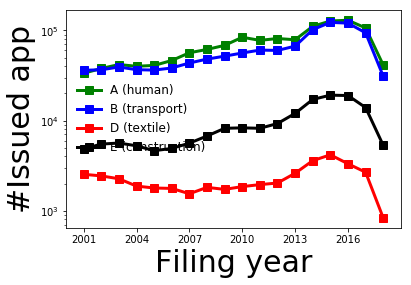

In [45]:
def plot_iss_per_sec_filing_year(X,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9):
    plt.clf()
    ax = plt.subplot(111)
    ax.set_yscale('log')
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='A (human)')
    plt.plot(X, Y2, '-bs', linewidth=3, markersize=8, label='B (transport)')
    #plt.plot(X, Y3, '-rs', linewidth=3, markersize=8, label='C')
    plt.plot(X, Y4, '-rs', linewidth=3, markersize=8, label='D (textile)')
    plt.plot(X, Y5, '-ks', linewidth=3, markersize=8, label='E (construction)')
    #plt.plot(X, Y6, '-ys', linewidth=3, markersize=8, label='F')
    #plt.plot(X, Y7, '-r*', linewidth=3, markersize=8, label='G')
    #plt.plot(X, Y8, '-k*', linewidth=3, markersize=8, label='H')
    #plt.plot(X, Y9, '-g*', linewidth=3, markersize=8, label='Y')
    
    ax.set_ylabel('#Issued app', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=12)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
    
num = [1]*18
X, Y1 = no_normalize_year19(iss_A_year, num)
X, Y2 = no_normalize_year19(iss_B_year, num)
X, Y3 = no_normalize_year19(iss_C_year, num)
X, Y4 = no_normalize_year19(iss_D_year, num)
X, Y5 = no_normalize_year19(iss_E_year, num)
X, Y6 = no_normalize_year19(iss_F_year, num)
X, Y7 = no_normalize_year19(iss_G_year, num)
X, Y8 = no_normalize_year19(iss_H_year, num)
X, Y9 = no_normalize_year19(iss_Y_year, num)

plot_iss_per_sec_filing_year(X,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9)

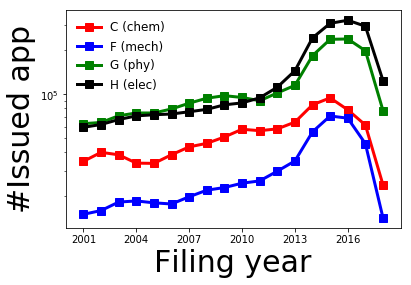

In [46]:
def plot_iss_per_sec_filing_year2(X,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9):
    plt.clf()
    ax = plt.subplot(111)
    ax.set_yscale('log')
    plt.plot(X, Y3, '-rs', linewidth=3, markersize=8, label='C (chem)')
    #plt.plot(X, Y4, '-k^', linewidth=3, markersize=8, label='D')
    #plt.plot(X, Y5, '-g^', linewidth=3, markersize=8, label='E')
    plt.plot(X, Y6, '-bs', linewidth=3, markersize=8, label='F (mech)')
    plt.plot(X, Y7, '-gs', linewidth=3, markersize=8, label='G (phy)')
    plt.plot(X, Y8, '-ks', linewidth=3, markersize=8, label='H (elec)')
    
    ax.set_ylabel('#Issued app', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=12)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
    
num = [1]*18
X, Y1 = no_normalize_year19(iss_A_year, num)
X, Y2 = no_normalize_year19(iss_B_year, num)
X, Y3 = no_normalize_year19(iss_C_year, num)
X, Y4 = no_normalize_year19(iss_D_year, num)
X, Y5 = no_normalize_year19(iss_E_year, num)
X, Y6 = no_normalize_year19(iss_F_year, num)
X, Y7 = no_normalize_year19(iss_G_year, num)
X, Y8 = no_normalize_year19(iss_H_year, num)
X, Y9 = no_normalize_year19(iss_Y_year, num)

plot_iss_per_sec_filing_year2(X,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9)

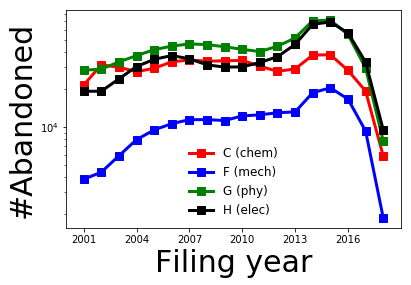

In [48]:
def plot_abn_per_sec_filing_year2(X,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9):
    plt.clf()
    ax = plt.subplot(111)
    ax.set_yscale('log')
    plt.plot(X, Y3, '-rs', linewidth=3, markersize=8, label='C (chem)')
    #plt.plot(X, Y4, '-k^', linewidth=3, markersize=8, label='D')
    #plt.plot(X, Y5, '-g^', linewidth=3, markersize=8, label='E')
    plt.plot(X, Y6, '-bs', linewidth=3, markersize=8, label='F (mech)')
    plt.plot(X, Y7, '-gs', linewidth=3, markersize=8, label='G (phy)')
    plt.plot(X, Y8, '-ks', linewidth=3, markersize=8, label='H (elec)')
    
    ax.set_ylabel('#Abandoned', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=12)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
    
num = [1]*18
X, Y1 = no_normalize_year19(abn_A_year, num)
X, Y2 = no_normalize_year19(abn_B_year, num)
X, Y3 = no_normalize_year19(abn_C_year, num)
X, Y4 = no_normalize_year19(abn_D_year, num)
X, Y5 = no_normalize_year19(abn_E_year, num)
X, Y6 = no_normalize_year19(abn_F_year, num)
X, Y7 = no_normalize_year19(abn_G_year, num)
X, Y8 = no_normalize_year19(abn_H_year, num)
X, Y9 = no_normalize_year19(abn_Y_year, num)

plot_abn_per_sec_filing_year2(X,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9)

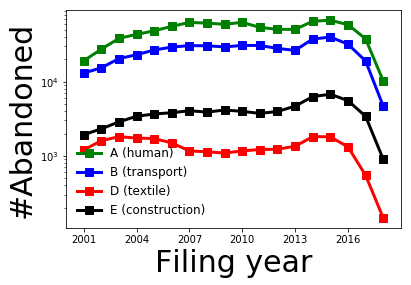

In [49]:
def plot_abn_per_sec_filing_year(X,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9):
    plt.clf()
    ax = plt.subplot(111)
    ax.set_yscale('log')
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='A (human)')
    plt.plot(X, Y2, '-bs', linewidth=3, markersize=8, label='B (transport)')
    #plt.plot(X, Y3, '-rs', linewidth=3, markersize=8, label='C')
    plt.plot(X, Y4, '-rs', linewidth=3, markersize=8, label='D (textile)')
    plt.plot(X, Y5, '-ks', linewidth=3, markersize=8, label='E (construction)')
    #plt.plot(X, Y6, '-ys', linewidth=3, markersize=8, label='F')
    #plt.plot(X, Y7, '-r*', linewidth=3, markersize=8, label='G')
    #plt.plot(X, Y8, '-k*', linewidth=3, markersize=8, label='H')
    #plt.plot(X, Y9, '-g*', linewidth=3, markersize=8, label='Y')
    
    ax.set_ylabel('#Abandoned', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=12)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
    
num = [1]*18
X, Y1 = no_normalize_year19(abn_A_year, num)
X, Y2 = no_normalize_year19(abn_B_year, num)
X, Y3 = no_normalize_year19(abn_C_year, num)
X, Y4 = no_normalize_year19(abn_D_year, num)
X, Y5 = no_normalize_year19(abn_E_year, num)
X, Y6 = no_normalize_year19(abn_F_year, num)
X, Y7 = no_normalize_year19(abn_G_year, num)
X, Y8 = no_normalize_year19(abn_H_year, num)
X, Y9 = no_normalize_year19(abn_Y_year, num)

plot_abn_per_sec_filing_year(X,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9)

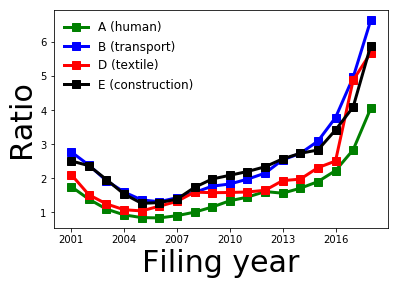

In [50]:
def plot_iss_abn_per_sec_filing_year(X,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='A (human)')
    plt.plot(X, Y2, '-bs', linewidth=3, markersize=8, label='B (transport)')
    #plt.plot(X, Y3, '-rs', linewidth=3, markersize=8, label='C')
    plt.plot(X, Y4, '-rs', linewidth=3, markersize=8, label='D (textile)')
    plt.plot(X, Y5, '-ks', linewidth=3, markersize=8, label='E (construction)')
    #plt.plot(X, Y6, '-ys', linewidth=3, markersize=8, label='F')
    #plt.plot(X, Y7, '-r*', linewidth=3, markersize=8, label='G')
    #plt.plot(X, Y8, '-k*', linewidth=3, markersize=8, label='H')
    #plt.plot(X, Y9, '-g*', linewidth=3, markersize=8, label='Y')
    #plt.plot(X, Y6, '-ys', linewidth=3, markersize=8, label='F')
    #plt.plot(X, Y7, '-r*', linewidth=3, markersize=8, label='G')
    #plt.plot(X, Y8, '-k*', linewidth=3, markersize=8, label='H')
    #plt.plot(X, Y9, '-g*', linewidth=3, markersize=8, label='Y')
    
    ax.set_ylabel('Ratio', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=12)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
    
num = [1]*18

ratioA = ratio_between_list(iss_A_year,abn_A_year)
X, Y1 = no_normalize_year19(ratioA, num)
ratioB = ratio_between_list(iss_B_year,abn_B_year)
X, Y2 = no_normalize_year19(ratioB, num)
ratioC = ratio_between_list(iss_C_year,abn_C_year)
X, Y3 = no_normalize_year19(ratioC, num)
ratioD = ratio_between_list(iss_D_year,abn_D_year)
X, Y4 = no_normalize_year19(ratioD, num)
ratioE = ratio_between_list(iss_E_year,abn_E_year)
X, Y5 = no_normalize_year19(ratioE, num)
ratioF = ratio_between_list(iss_F_year,abn_F_year)
X, Y6 = no_normalize_year19(ratioF, num)
ratioG = ratio_between_list(iss_G_year,abn_G_year)
X, Y7 = no_normalize_year19(ratioG, num)
ratioH = ratio_between_list(iss_H_year,abn_H_year)
X, Y8 = no_normalize_year19(ratioH, num)


plot_iss_abn_per_sec_filing_year(X,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8)

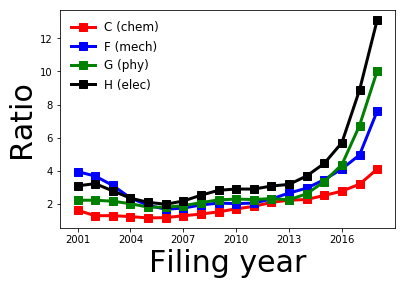

In [51]:
def plot_iss_abn_per_sec_filing_year2(X,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8):
    plt.clf()
    ax = plt.subplot(111)
    #plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='A')
    #plt.plot(X, Y2, '-bs', linewidth=3, markersize=8, label='B')
    plt.plot(X, Y3, '-rs', linewidth=3, markersize=8, label='C (chem)')
    #plt.plot(X, Y4, '-k^', linewidth=3, markersize=8, label='D')
    #plt.plot(X, Y5, '-g^', linewidth=3, markersize=8, label='E')
    plt.plot(X, Y6, '-bs', linewidth=3, markersize=8, label='F (mech)')
    plt.plot(X, Y7, '-gs', linewidth=3, markersize=8, label='G (phy)')
    plt.plot(X, Y8, '-ks', linewidth=3, markersize=8, label='H (elec)')
    #plt.plot(X, Y9, '-gs', linewidth=3, markersize=8, label='Y')
    
    ax.set_ylabel('Ratio', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=12)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
    
num = [1]*18

ratioA = ratio_between_list(iss_A_year,abn_A_year)
X, Y1 = no_normalize_year19(ratioA, num)
ratioB = ratio_between_list(iss_B_year,abn_B_year)
X, Y2 = no_normalize_year19(ratioB, num)
ratioC = ratio_between_list(iss_C_year,abn_C_year)
X, Y3 = no_normalize_year19(ratioC, num)
ratioD = ratio_between_list(iss_D_year,abn_D_year)
X, Y4 = no_normalize_year19(ratioD, num)
ratioE = ratio_between_list(iss_E_year,abn_E_year)
X, Y5 = no_normalize_year19(ratioE, num)
ratioF = ratio_between_list(iss_F_year,abn_F_year)
X, Y6 = no_normalize_year19(ratioF, num)
ratioG = ratio_between_list(iss_G_year,abn_G_year)
X, Y7 = no_normalize_year19(ratioG, num)
ratioH = ratio_between_list(iss_H_year,abn_H_year)
X, Y8 = no_normalize_year19(ratioH, num)


plot_iss_abn_per_sec_filing_year2(X,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8)

In [52]:
def compute_iss_two_per_sec_years(main_app_date_dict,sec_app_dict):
    
    iss_AB_year=[0]*18
    iss_AG_year=[0]*18
    iss_AH_year=[0]*18
    iss_BG_year=[0]*18
    iss_BH_year=[0]*18
    iss_GH_year=[0]*18
    
    
    abn_AB_year=[0]*18
    abn_AG_year=[0]*18
    abn_AH_year=[0]*18
    abn_BG_year=[0]*18
    abn_BH_year=[0]*18
    abn_GH_year=[0]*18
    
    AB = create_match_list(sec_app_dict['A'], sec_app_dict['B'])
    AG = create_match_list(sec_app_dict['A'], sec_app_dict['G'])
    AH = create_match_list(sec_app_dict['A'], sec_app_dict['H'])
    BG = create_match_list(sec_app_dict['G'], sec_app_dict['B'])
    BH = create_match_list(sec_app_dict['B'], sec_app_dict['H'])
    GH = create_match_list(sec_app_dict['G'], sec_app_dict['H'])
    
    
    for app in AB:
        if app in main_app_date_dict:
            if app in peds_status_dict: 

                d = datetime.strptime(main_app_date_dict[app], "%Y%m%d").year
                d = d-2000
                yr = d%20 # we have till 2018

                status = peds_status_dict[app]

                if status == "ISS":
                    iss_AB_year[yr-1] = iss_AB_year[yr-1]+1
                if status == "ABN":
                    abn_AB_year[yr-1] = abn_AB_year[yr-1]+1 
    for app in AG:
        if app in main_app_date_dict:
            if app in peds_status_dict: 

                d = datetime.strptime(main_app_date_dict[app], "%Y%m%d").year
                d = d-2000
                yr = d%20 # we have till 2018

                status = peds_status_dict[app]

                if status == "ISS":
                    iss_AG_year[yr-1] = iss_AG_year[yr-1]+1
                if status == "ABN":
                    abn_AG_year[yr-1] = abn_AG_year[yr-1]+1  
    
    for app in AH:
        if app in main_app_date_dict:
            if app in peds_status_dict: 

                d = datetime.strptime(main_app_date_dict[app], "%Y%m%d").year
                d = d-2000
                yr = d%20 # we have till 2018

                status = peds_status_dict[app]

                if status == "ISS":
                    iss_AH_year[yr-1] = iss_AH_year[yr-1]+1
                if status == "ABN":
                    abn_AH_year[yr-1] = abn_AH_year[yr-1]+1  
                    
    for app in BG:
        if app in main_app_date_dict:
            if app in peds_status_dict: 

                d = datetime.strptime(main_app_date_dict[app], "%Y%m%d").year
                d = d-2000
                yr = d%20 # we have till 2018

                status = peds_status_dict[app]

                if status == "ISS":
                    iss_BG_year[yr-1] = iss_BG_year[yr-1]+1
                if status == "ABN":
                    abn_BG_year[yr-1] = abn_BG_year[yr-1]+1
    for app in BH:
        if app in main_app_date_dict:
            if app in peds_status_dict: 

                d = datetime.strptime(main_app_date_dict[app], "%Y%m%d").year
                d = d-2000
                yr = d%20 # we have till 2018

                status = peds_status_dict[app]

                if status == "ISS":
                    iss_BH_year[yr-1] = iss_BH_year[yr-1]+1
                if status == "ABN":
                    abn_BH_year[yr-1] = abn_BH_year[yr-1]+1 
    
    for app in GH:
        if app in main_app_date_dict:
            if app in peds_status_dict: 

                d = datetime.strptime(main_app_date_dict[app], "%Y%m%d").year
                d = d-2000
                yr = d%20 # we have till 2018

                status = peds_status_dict[app]

                if status == "ISS":
                    iss_GH_year[yr-1] = iss_GH_year[yr-1]+1
                if status == "ABN":
                    abn_GH_year[yr-1] = abn_GH_year[yr-1]+1 
            
        
    
            
            
    return iss_AB_year, iss_AG_year, iss_AH_year, iss_BG_year, iss_BH_year, iss_GH_year, abn_AB_year, abn_AG_year, abn_AH_year, abn_BG_year,abn_BH_year, abn_GH_year

In [53]:
iss_AB_year, iss_AG_year, iss_AH_year, iss_BG_year, iss_BH_year, iss_GH_year, abn_AB_year, abn_AG_year, abn_AH_year, abn_BG_year,abn_BH_year, abn_GH_year = compute_iss_two_per_sec_years(main_app_date_dict,sec_app_dict)

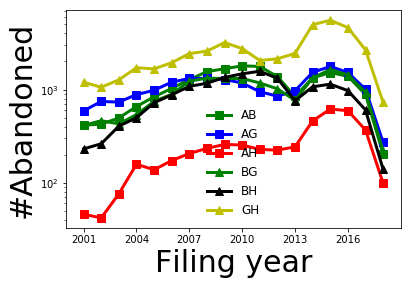

In [55]:
def plot_abn_two_per_sec_filing_year(X,Y1,Y2,Y3,Y4,Y5,Y6):
    plt.clf()
    ax = plt.subplot(111)
    ax.set_yscale('log')
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='AB')
    plt.plot(X, Y2, '-bs', linewidth=3, markersize=8, label='AG')
    plt.plot(X, Y3, '-rs', linewidth=3, markersize=8, label='AH')
    plt.plot(X, Y4, '-g^', linewidth=3, markersize=8, label='BG')
    plt.plot(X, Y5, '-k^', linewidth=3, markersize=8, label='BH')
    plt.plot(X, Y6, '-y^', linewidth=3, markersize=8, label='GH')
    #plt.plot(X, Y7, '-r*', linewidth=3, markersize=8, label='G')
    #plt.plot(X, Y8, '-k*', linewidth=3, markersize=8, label='H')
    #plt.plot(X, Y9, '-g*', linewidth=3, markersize=8, label='Y')
    
    ax.set_ylabel('#Abandoned', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=12)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
    
num = [1]*18
X, Y1 = no_normalize_year19(abn_AB_year, num)
X, Y2 = no_normalize_year19(abn_AG_year, num)
X, Y3 = no_normalize_year19(abn_AH_year, num)
X, Y4 = no_normalize_year19(abn_BG_year, num)
X, Y5 = no_normalize_year19(abn_BH_year, num)
X, Y6 = no_normalize_year19(abn_GH_year, num)

plot_abn_two_per_sec_filing_year(X,Y1,Y2,Y3,Y4,Y5,Y6)

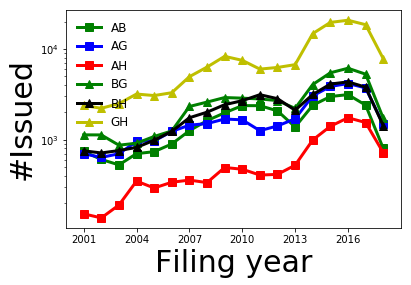

In [57]:
def plot_iss_two_per_sec_filing_year(X,Y1,Y2,Y3,Y4,Y5,Y6):
    plt.clf()
    ax = plt.subplot(111)
    ax.set_yscale('log')
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='AB')
    plt.plot(X, Y2, '-bs', linewidth=3, markersize=8, label='AG')
    plt.plot(X, Y3, '-rs', linewidth=3, markersize=8, label='AH')
    plt.plot(X, Y4, '-g^', linewidth=3, markersize=8, label='BG')
    plt.plot(X, Y5, '-k^', linewidth=3, markersize=8, label='BH')
    plt.plot(X, Y6, '-y^', linewidth=3, markersize=8, label='GH')
    #plt.plot(X, Y7, '-r*', linewidth=3, markersize=8, label='G')
    #plt.plot(X, Y8, '-k*', linewidth=3, markersize=8, label='H')
    #plt.plot(X, Y9, '-g*', linewidth=3, markersize=8, label='Y')
    
    ax.set_ylabel('#Issued', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=12)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
    
num = [1]*18
X, Y1 = no_normalize_year19(iss_AB_year, num)
X, Y2 = no_normalize_year19(iss_AG_year, num)
X, Y3 = no_normalize_year19(iss_AH_year, num)
X, Y4 = no_normalize_year19(iss_BG_year, num)
X, Y5 = no_normalize_year19(iss_BH_year, num)
X, Y6 = no_normalize_year19(iss_GH_year, num)

plot_iss_two_per_sec_filing_year(X,Y1,Y2,Y3,Y4,Y5,Y6)

# cpcs over years

In [58]:
def compute_cpc_years(main_app_date_dict,df_app_cpc):
    
    sec_app_dict, sub_app_dict, group_app_dict, app_sec_dict, app_sub_dict, app_gr_dict = create_app_sec_sub_gr_dict(main_app_date_dict,df_app_cpc)
    
    iss_sec_year=[0]*18
    iss_sub_year=[0]*18
    iss_gr_year = [0]*18
    num_iss = [0]*18
    
    
    abn_sec_year=[0]*18
    abn_sub_year=[0]*18
    abn_gr_year = [0]*18
    num_abn = [0]*18
    
    
    for i in main_app_date_dict:
        patid = i
        if patid in peds_status_dict: 
           
            d = datetime.strptime(main_app_date_dict[patid], "%Y%m%d").year
            d = d-2000
            yr = d%20 # we have till 2018
            
            status = peds_status_dict[patid]
            
            if status == "ISS":
            
                    if patid in app_sec_dict:
                            num_sec = len(app_sec_dict[patid])
                            num_sub = len(app_sub_dict[patid])
                            num_gr = len(app_gr_dict[patid])
                            iss_sec_year[yr-1] = iss_sec_year[yr-1] + num_sec
                            iss_sub_year[yr-1] = iss_sub_year[yr-1] + num_sub
                            iss_gr_year[yr-1] = iss_gr_year[yr-1] + num_gr
                            num_iss[yr-1]=num_iss[yr-1]+1
            
            if status == "ABN":

                    if patid in app_sec_dict:
                            num_sec = len(app_sec_dict[patid])
                            num_sub = len(app_sub_dict[patid])
                            num_gr = len(app_gr_dict[patid])
                            abn_sec_year[yr-1] = abn_sec_year[yr-1] + num_sec
                            abn_sub_year[yr-1] = abn_sub_year[yr-1] + num_sub
                            abn_gr_year[yr-1] = abn_gr_year[yr-1] + num_gr
                            num_abn[yr-1]=num_abn[yr-1]+1

        
    return iss_sec_year, iss_sub_year, iss_gr_year, abn_sec_year, abn_sub_year, abn_gr_year, num_iss, num_abn

In [59]:
iss_sec_year, iss_sub_year, iss_gr_year, abn_sec_year, abn_sub_year, abn_gr_year, num_iss, num_abn= compute_cpc_years(main_app_date_dict,df_app_cpc) 

main dictionary:  5695616
Problem:  122


In [60]:
print(iss_sec_year)
print(abn_sec_year)
print(iss_sub_year)
print(abn_sub_year)
print(iss_gr_year)
print(abn_gr_year)
print(num_iss)
print(sum(num_iss))
print(num_abn)
print(sum(num_abn))

[169349, 186250, 210288, 208187, 205532, 215553, 230500, 236557, 234981, 246915, 260741, 277686, 286784, 308970, 308853, 270396, 196676, 69768]
[70070, 83260, 109038, 122472, 134158, 145044, 143721, 131099, 117754, 118048, 121316, 119865, 119670, 117913, 100476, 72102, 38790, 9492]
[178452, 195606, 219312, 217697, 215208, 226563, 244507, 252724, 254120, 267742, 279125, 295923, 300103, 333221, 340835, 303721, 225708, 81166]
[75454, 90327, 115464, 129208, 141595, 153686, 153646, 141399, 128920, 129336, 130744, 128028, 125598, 127301, 111018, 81226, 44481, 10983]
[189761, 207591, 229549, 228219, 228167, 241263, 264066, 275223, 280851, 294656, 301340, 317062, 319970, 370395, 389876, 354676, 267099, 97162]
[82663, 100431, 123501, 137523, 152931, 166820, 170940, 159651, 147687, 147269, 143921, 138824, 134276, 142312, 127693, 95695, 53079, 13180]
[155155, 171297, 194276, 190798, 187151, 194293, 202374, 204590, 198007, 208650, 225598, 243839, 255143, 256675, 244583, 206433, 142083, 48601]
3529

In [61]:
num = [a_i + b_i for a_i, b_i in zip(num_iss,num_abn)]
print(num)
print(sum(num))

[217407, 244953, 292232, 300261, 306738, 322234, 326421, 315178, 294419, 305680, 328678, 347676, 361194, 353994, 322765, 260407, 169284, 54973]
5124494


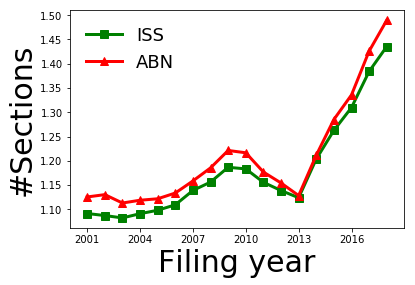

In [62]:
def plot_app_CPC_sec_per_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='ISS')
    plt.plot(X, Y2, '-r^', linewidth=3, markersize=8, label='ABN')
    ax.set_ylabel('#Sections', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=18)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_sec_year, num_iss)
X, Y2 = normalize_year19(abn_sec_year, num_abn)
plot_app_CPC_sec_per_filing_year(X,Y1,Y2)

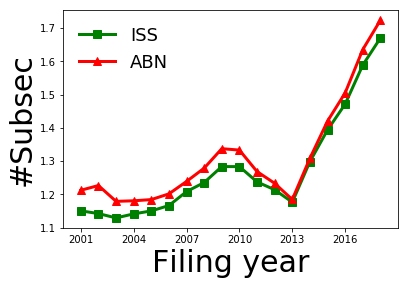

In [63]:
def plot_app_CPC_sub_per_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='ISS')
    plt.plot(X, Y2, '-r^', linewidth=3, markersize=8, label='ABN')
    ax.set_ylabel('#Subsec', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=18)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_sub_year, num_iss)
X, Y2 = normalize_year19(abn_sub_year, num_abn)
plot_app_CPC_sub_per_filing_year(X,Y1,Y2)

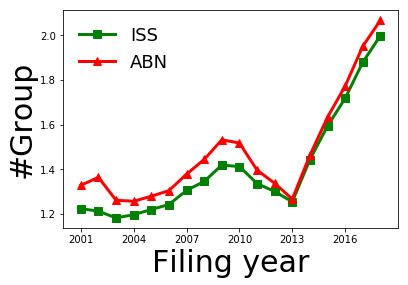

In [64]:
def plot_app_CPC_group_per_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='ISS')
    plt.plot(X, Y2, '-r^', linewidth=3, markersize=8, label='ABN')
    ax.set_ylabel('#Group', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=18)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_gr_year, num_iss)
X, Y2 = normalize_year19(abn_gr_year, num_abn)
plot_app_CPC_group_per_filing_year(X,Y1,Y2)

# Lifetime

In [ ]:
# important dictionaries
# main_app_date_dict, 
#app_num_inv_dict, iss_inv_dict, abn_inv_dict
# peds_status_dict, peds_status_date_dict

In [98]:
def check(peds_status_date_dict):
    for i in peds_status_date_dict:
        if peds_status_date_dict[i] == "nan":
            print(i)
check(peds_status_date_dict)

10188192
10979677
11119040
11227050
11253299
11325757
11325948
11366247
11401625
11455951
11480304
11675917
11686925
11804016
11811156
11824584
11782516
11869707
11972992
12060211
12157180
12139285
12176255
12203241
12206001
12246619
12248563
12313788
12391848
12467119
12455529
12499970
12460156
12556556
12561066
12631442
12713428
12761327
12783392
12803081
12819195
12820913
12875124
12886501
12891785
12892566
12893813
12982561
13028150
13073878
13082374
13082959
13088551
13095554
13179262
13198898
13206292
13209317
13199550
13222864
13239757
13276444
13373662
13310762
13341009
13348857
13353312
13367083
13402745
13410481
13416796
13426490
13428964
13428991
13442159
13451156
13475994
13524897
13533527
13536781
13507829
13564524
13571221
13591705
13620131
13627031
13573711
13655338
13655803
13656991
13664284
13673040
13673869
13720181
13764637
13770685
13773836
13775933
13780491
13782260
13797820
13801224
13826262
13826866
13829060
13831398
13831481
13838388
13839360
13841254
13843098
1

KeyboardInterrupt: 

In [104]:
def lifetime_per_app( main_app_date_dict, peds_status_dict, peds_status_date_dict):
    
    iss_app_life_dict = dict()
    abn_app_life_dict = dict()
    for i in main_app_date_dict:
        date_app = main_app_date_dict[i]
        if i in peds_status_date_dict:
            date_gr = peds_status_date_dict[i]
            
            time = days_between_hN(date_gr,date_app)
            status =  peds_status_dict[i]
            
            if status == "ABN":
                abn_app_life_dict[i] = time
                
            if status == "ISS":
                iss_app_life_dict[i] = time
       
    return iss_app_life_dict, abn_app_life_dict

In [105]:
iss_app_life_dict, abn_app_life_dict = lifetime_per_app( main_app_date_dict, peds_status_dict, peds_status_date_dict)

maximum lifetime in days in issued  6872
Number of unique issued: 3529323


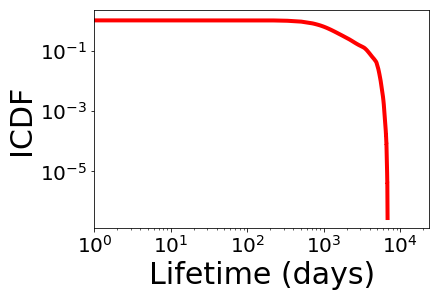

In [107]:
#Inverse cumulative density funcition

def plot_lifetime_per_issued_icdf(count):
    plt.clf()
    ax = plt.subplot(111)
    ax.loglog(range(len(count)), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('Lifetime (days)', fontsize=30)
    ax.tick_params(labelsize=20)
    ax.set_xlim(1,24000)
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
    
#Computing ICDF

print("maximum lifetime in days in issued ",max(list(iss_app_life_dict.values())))
print("Number of unique issued:", len(list(iss_app_life_dict.keys())))
count = icdf(iss_app_life_dict)
    
plot_lifetime_per_issued_icdf(count)

maximum lifetime in days in abandoned 6665
Number of unique abandoned: 1594996


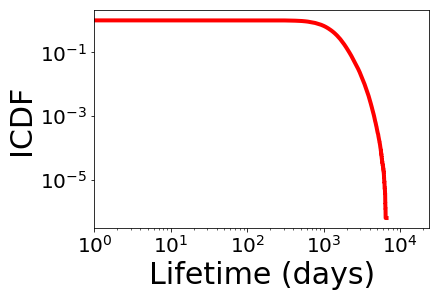

In [108]:
#Inverse cumulative density funcition

def plot_lifetime_per_abn_icdf(count):
    plt.clf()
    ax = plt.subplot(111)
    ax.loglog(range(len(count)), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('Lifetime (days)', fontsize=30)
    ax.tick_params(labelsize=20)
    ax.set_xlim(1,24000)
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
    
#Computing ICDF

print("maximum lifetime in days in abandoned",max(list(abn_app_life_dict.values())))
print("Number of unique abandoned:", len(list(abn_app_life_dict.keys())))
count = icdf(abn_app_life_dict)
    
plot_lifetime_per_abn_icdf(count)

In [119]:
def compute_app_lifetime_filing_years(main_app_date_dict,peds_status_dict,peds_status_date_dict):
    
    #app_filing_date_dict = create_app_filing_date_dict(app_par_df)
    iss_app_life_dict, abn_app_life_dict = lifetime_per_app( main_app_date_dict, peds_status_dict, peds_status_date_dict)
    
    iss_inv_year = [0]*18
    abn_inv_year = [0]*18
    num_abn = [0]*18
    num_iss = [0]*18
    
    iss_inv_dict = dict()
    abn_inv_dict = dict()
    
    for i in main_app_date_dict:
        
        appid = i
        
        if appid in peds_status_dict: 
        #if appid not in mismatch: 
            d = datetime.strptime(main_app_date_dict[appid], "%Y%m%d").year
            d = d - 2000
            yr = d%20 # we have till 2018
            
            
            status = peds_status_dict[appid]
            
            if status == "ISS" and appid in iss_app_life_dict:
                num_inv = iss_app_life_dict[appid]
                iss_inv_year[yr-1] = iss_inv_year[yr-1] + num_inv
                num_iss[yr-1]=num_iss[yr-1]+1
                
                
            if status == "ABN" and appid in abn_app_life_dict:
            
                num_inv = abn_app_life_dict[appid]
                abn_inv_year[yr-1] = abn_inv_year[yr-1] + num_inv
                num_abn[yr-1]=num_abn[yr-1]+1
       
        
    return iss_inv_year, abn_inv_year, num_iss, num_abn 

In [121]:
iss_lifetime_year, abn_lifetime_year, num_iss, num_abn = compute_app_lifetime_filing_years(main_app_date_dict,peds_status_dict,peds_status_date_dict)

In [122]:
print(iss_lifetime_year)
print(abn_lifetime_year)
print(num_iss)
print(sum(num_iss))
print(num_abn)
print(sum(num_abn))

[426795010, 476067655, 540948228, 501981725, 449390634, 423440266, 411209634, 380568490, 321783809, 301995140, 296324624, 293725073, 283981687, 257263199, 218305066, 158016638, 85090180, 19516984]
[80426874, 103160221, 150576603, 171048643, 187813131, 194648074, 185100292, 163792356, 138579354, 132250545, 132675761, 127321868, 124885918, 107213571, 77212970, 45378963, 17869326, 2724072]
[155155, 171297, 194276, 190798, 187151, 194294, 202374, 204590, 198008, 208655, 225610, 243854, 255144, 256675, 244583, 206432, 142045, 48382]
3529323
[62252, 73656, 97956, 109463, 119587, 127941, 124048, 110591, 96415, 97033, 103098, 103857, 106051, 97319, 78182, 53974, 27201, 6372]
1594996


In [123]:
num = [a_i + b_i for a_i, b_i in zip(num_iss,num_abn)]
print(num)
print(sum(num))

[217407, 244953, 292232, 300261, 306738, 322235, 326422, 315181, 294423, 305688, 328708, 347711, 361195, 353994, 322765, 260406, 169246, 54754]
5124319


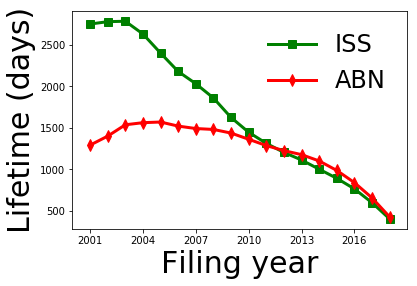

In [124]:
def plot_app_lifetime_per_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='ABN')
    ax.set_ylabel('Lifetime (days)', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_lifetime_year, num_iss)
X, Y2 = normalize_year19(abn_lifetime_year, num_abn)
plot_app_lifetime_per_filing_year(X,Y1,Y2)

In [125]:
iss_lifetime_year1 = [426795010, 476067655, 540948228, 501981725, 449390634, 423440266, 411209634, 380568490, 321783809, 301995140, 296324624, 293725073, 283981687, 257263199, 218305066, 158016638, 85090180, 19516984]
abn_lifetime_year1 = [80426874, 103160221, 150576603, 171048643, 187813131, 194648074, 185100292, 163792356, 138579354, 132250545, 132675761, 127321868, 124885918, 107213571, 77212970, 45378963, 17869326, 2724072]
Y_plus = [a_i + b_i for a_i, b_i in zip(iss_lifetime_year1,abn_lifetime_year1)]
num = [a_i + b_i for a_i, b_i in zip(num_iss,num_abn)]

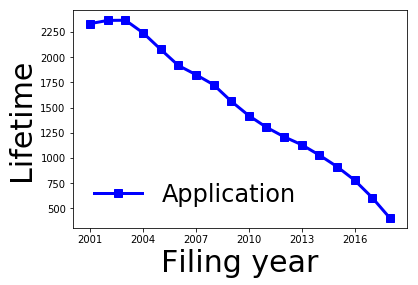

In [126]:
def plot_app_LTall_per_filing_year(X,Y):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y, '-bs', linewidth=3, markersize=8, label='Application')
    #plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='ABN')
    ax.set_ylabel('Lifetime', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y = normalize_year19(Y_plus, num)
plot_app_LTall_per_filing_year(X,Y)

## Claim

In [32]:
# important dictionaries
# main_app_date_dict, 
#app_num_inv_dict, iss_inv_dict, abn_inv_dict
# peds_status_dict, peds_status_date_dict

In [65]:
def create_combined_claimframe(low,high):   
    frames=[]
    for i in range(low,high):
        numb = i
        app_path = "/kellogg/proj/smz6657/parsed_application_data/"+str(numb)+"/claim_info/"
        temp_df = combine_csv_to_df(app_path)
        frames.append(temp_df)
    app_par_df = pd.concat(frames)
    return app_par_df

In [66]:
claim_par_df = create_combined_claimframe(2001,2020) # collecting from 2001-2019

In [67]:
claim_par_df.head()

,app_id,app_date,app_claim,ind_claim,dep_claim
0,9865525,20010529,\n\n1. Protective helmet (1) of the type const...,6,4
1,9911749,20010723,"\nWhat is claimed is: \n\n1. A face mask, comp...",3,9
2,9867084,20010529,\nWhat is claimed is: \n\n1. A glove to unload...,2,30
3,9933649,20010820,\nI claim: \n\n1. A disposable garment protect...,2,31
4,9841814,20010425,\nWe claim: \n\n1. Therapy apparel for a child...,2,16


In [36]:
claim_par_df.isnull().sum()

app_id       0
app_date     0
app_claim    0
ind_claim    0
dep_claim    0
dtype: int64

In [68]:
# check claim distribution 
def num_claim_per_app(df):
    '''
    Given input dataframe it gives a dictionary with number of claims
    '''
    app_depclaim_dict = dict()
    app_indclaim_dict = dict()
    app_id_ls = list(df['app_id'].apply(str))
    app_ind_claim_ls = list(df['ind_claim'].apply(str))
    app_dep_claim_ls = list(df['dep_claim'].apply(str))
    
    for i in range(0,len(app_id_ls)):
        appid = app_id_ls[i]
        clind = float(app_ind_claim_ls[i])
        cldep = float(app_dep_claim_ls[i])
        
        app_indclaim_dict[appid] = clind
        app_depclaim_dict[appid] = cldep
        
        
    return app_indclaim_dict, app_depclaim_dict

In [69]:
app_indclaim_dict, app_depclaim_dict = num_claim_per_app(claim_par_df)

In [70]:
len(app_indclaim_dict)

5894829

In [71]:
len(app_depclaim_dict)

5894829

maximum independent claims in an application 725
Number of unique abandoned: 5894829


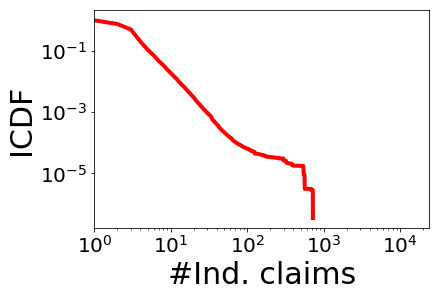

In [72]:
#Inverse cumulative density funcition

def plot_indclaim_per_app_icdf(count):
    plt.clf()
    ax = plt.subplot(111)
    ax.loglog(range(len(count)), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#Ind. claims', fontsize=30)
    ax.tick_params(labelsize=20)
    ax.set_xlim(1,24000)
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
    
#Computing ICDF
app_indclaim_int = dict()
for x in app_indclaim_dict:
    app_indclaim_int[x] = int(app_indclaim_dict[x])
print("maximum independent claims in an application",max(list(app_indclaim_int.values())))
print("Number of unique abandoned:", len(list(app_indclaim_int.keys())))
count = icdf(app_indclaim_int)
    
plot_indclaim_per_app_icdf(count)

maximum dependent claims in an application 8575
Number of unique abandoned: 5894829


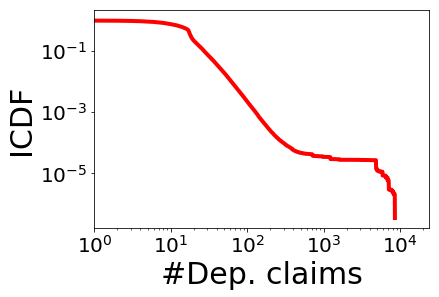

In [73]:
#Inverse cumulative density funcition

def plot_depclaim_per_app_icdf(count):
    plt.clf()
    ax = plt.subplot(111)
    ax.loglog(range(len(count)), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#Dep. claims', fontsize=30)
    ax.tick_params(labelsize=20)
    ax.set_xlim(1,24000)
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
    
#Computing ICDF
app_depclaim_int = dict()
for x in app_depclaim_dict:
    app_depclaim_int[x] = int(app_depclaim_dict[x])
print("maximum dependent claims in an application",max(list(app_depclaim_int.values())))
print("Number of unique abandoned:", len(list(app_depclaim_int.keys())))
count = icdf(app_depclaim_int)
    
plot_depclaim_per_app_icdf(count)

In [74]:
def compute_app_indclaim_filing_years(main_app_date_dict,peds_status_dict,claim_par_df):
    
    #app_filing_date_dict = create_app_filing_date_dict(app_par_df)
    app_indclaim_dict, app_depclaim_dict = num_claim_per_app(claim_par_df)
    
    iss_indclaim_year = [0]*18
    abn_indclaim_year = [0]*18
    num_abn = [0]*18
    num_iss = [0]*18
    
    
    for i in main_app_date_dict:
        
        appid = i
        
        if appid in peds_status_dict: 
        #if appid not in mismatch: 
            d = datetime.strptime(main_app_date_dict[appid], "%Y%m%d").year
            d = d - 2000
            yr = d%20 # we have till 2018
            
            
            status = peds_status_dict[appid]
            
            if status == "ISS":
                num_claim = app_indclaim_dict[appid]
                iss_indclaim_year[yr-1] =iss_indclaim_year[yr-1] + num_claim
                num_iss[yr-1]=num_iss[yr-1]+1
                
                
            if status == "ABN":
            
                num_claim = app_indclaim_dict[appid]
                abn_indclaim_year[yr-1] = abn_indclaim_year[yr-1] + num_claim
                num_abn[yr-1]=num_abn[yr-1]+1
       
        
    return iss_indclaim_year, abn_indclaim_year, num_iss, num_abn 

In [75]:
iss_indclaim_year, abn_indclaim_year, num_iss, num_abn = compute_app_indclaim_filing_years(main_app_date_dict,peds_status_dict,claim_par_df)

In [76]:
print(iss_indclaim_year)
print(abn_indclaim_year)
print(num_iss)
print(sum(num_iss))
print(num_abn)
print(sum(num_abn))

[678294.0, 724376.0, 755533.0, 671741.0, 578870.0, 586662.0, 587219.0, 570270.0, 535480.0, 553678.0, 588961.0, 633092.0, 653794.0, 644923.0, 603517.0, 501176.0, 338850.0, 111358.0]
[267146.0, 319190.0, 388250.0, 383863.0, 364392.0, 377455.0, 349172.0, 298902.0, 252718.0, 250593.0, 261486.0, 263157.0, 269834.0, 243135.0, 189334.0, 127023.0, 62133.0, 13914.0]
[155155, 171297, 194276, 190798, 187151, 194294, 202374, 204590, 198008, 208655, 225610, 243854, 255144, 256675, 244583, 206433, 142083, 48601]
3529581
[62252, 73656, 97956, 109463, 119587, 127941, 124048, 110591, 96415, 97033, 103098, 103857, 106051, 97319, 78182, 53974, 27201, 6372]
1594996


In [77]:
num = [a_i + b_i for a_i, b_i in zip(num_iss,num_abn)]
print(num)
print(sum(num))

[217407, 244953, 292232, 300261, 306738, 322235, 326422, 315181, 294423, 305688, 328708, 347711, 361195, 353994, 322765, 260407, 169284, 54973]
5124577


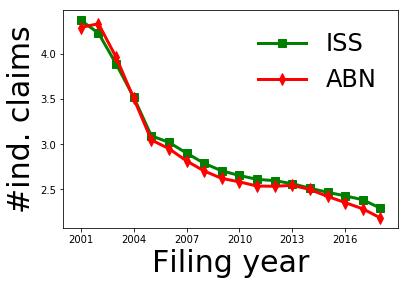

In [78]:
def plot_app_indclaim_per_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='ABN')
    ax.set_ylabel('#ind. claims', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_indclaim_year, num_iss)
X, Y2 = normalize_year19(abn_indclaim_year, num_abn)
plot_app_indclaim_per_filing_year(X,Y1,Y2)

In [79]:
def compute_app_depclaim_filing_years(main_app_date_dict,peds_status_dict,claim_par_df):
    
    #app_filing_date_dict = create_app_filing_date_dict(app_par_df)
    app_indclaim_dict, app_depclaim_dict = num_claim_per_app(claim_par_df)
    
    iss_depclaim_year = [0]*18
    abn_depclaim_year = [0]*18
    num_abn = [0]*18
    num_iss = [0]*18
    
    
    for i in main_app_date_dict:
        
        appid = i
        
        if appid in peds_status_dict: 
        #if appid not in mismatch: 
            d = datetime.strptime(main_app_date_dict[appid], "%Y%m%d").year
            d = d - 2000
            yr = d%20 # we have till 2018
            
            
            status = peds_status_dict[appid]
            
            if status == "ISS":
                num_claim = app_depclaim_dict[appid]
                iss_depclaim_year[yr-1] =iss_depclaim_year[yr-1] + num_claim
                num_iss[yr-1]=num_iss[yr-1]+1
                
                
            if status == "ABN":
            
                num_claim = app_depclaim_dict[appid]
                abn_depclaim_year[yr-1] = abn_depclaim_year[yr-1] + num_claim
                num_abn[yr-1]=num_abn[yr-1]+1
       
        
    return iss_depclaim_year, abn_depclaim_year, num_iss, num_abn 

In [80]:
iss_depclaim_year, abn_depclaim_year, num_iss, num_abn = compute_app_depclaim_filing_years(main_app_date_dict,peds_status_dict,claim_par_df)

In [81]:
print(iss_depclaim_year)
print(abn_depclaim_year)
print(num_iss)
print(sum(num_iss))
print(num_abn)
print(sum(num_abn))

[3595532.0, 3762286.0, 3879599.0, 3763839.0, 3258593.0, 3352174.0, 3378717.0, 3274131.0, 3107377.0, 3266778.0, 3503715.0, 3788631.0, 3960639.0, 3928448.0, 3684093.0, 3085043.0, 2093500.0, 698337.0]
[1285535.0, 1461972.0, 1891355.0, 2059896.0, 2005386.0, 2129923.0, 1978744.0, 1711547.0, 1447075.0, 1443923.0, 1514781.0, 1524553.0, 1573525.0, 1428037.0, 1117333.0, 746894.0, 369265.0, 83320.0]
[155155, 171297, 194276, 190798, 187151, 194294, 202374, 204590, 198008, 208655, 225610, 243854, 255144, 256675, 244583, 206433, 142083, 48601]
3529581
[62252, 73656, 97956, 109463, 119587, 127941, 124048, 110591, 96415, 97033, 103098, 103857, 106051, 97319, 78182, 53974, 27201, 6372]
1594996


In [66]:
iss_depclaim_year = [3595532.0, 3762286.0, 3879599.0, 3763839.0, 3258593.0, 3352174.0, 3378717.0, 3274131.0, 3107377.0, 3266778.0, 3503715.0, 3788631.0, 3960639.0, 3928448.0, 3684093.0, 3085043.0, 2093500.0, 698337.0]
abn_depclaim_year = [1285535.0, 1461972.0, 1891355.0, 2059896.0, 2005386.0, 2129923.0, 1978744.0, 1711547.0, 1447075.0, 1443923.0, 1514781.0, 1524553.0, 1573525.0, 1428037.0, 1117333.0, 746894.0, 369265.0, 83320.0]

In [62]:
num = [a_i + b_i for a_i, b_i in zip(num_iss,num_abn)]
print(num)
print(sum(num))

[217407, 244953, 292232, 300261, 306738, 322235, 326422, 315181, 294423, 305688, 328708, 347711, 361195, 353994, 322765, 260407, 169284, 54973]
5124577


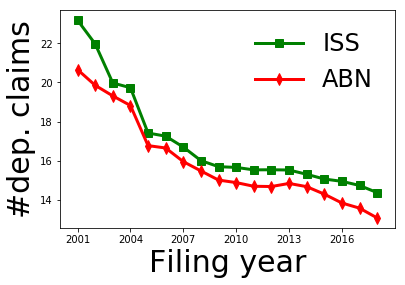

In [82]:
def plot_app_depclaim_per_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='ABN')
    ax.set_ylabel('#dep. claims', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_depclaim_year, num_iss)
X, Y2 = normalize_year19(abn_depclaim_year, num_abn)
plot_app_depclaim_per_filing_year(X,Y1,Y2)

In [68]:
s= "a bc def \n skl "
print(s)

a bc def 
 skl 


In [69]:
sum(len(x) for x in s.split())

9

In [83]:
# check claim distribution 
def length_claim_per_app(df):
    '''
    Given input dataframe it gives a dictionary with number of claims
    '''
    app_text_claim_dict = dict()
    #app_indclaim_dict = dict()
    app_id_ls = list(df['app_id'].apply(str))
    app_text_claim_ls = list(df['app_claim'].apply(str))
    #app_dep_claim_ls = list(df['dep_claim'].apply(str))
    
    for i in range(0,len(app_id_ls)):
        appid = app_id_ls[i]
        
        claim_text = app_text_claim_ls[i]
        txt_len = sum(len(x) for x in claim_text.split())
        
        app_text_claim_dict[appid] = txt_len
        
        
        
    return app_text_claim_dict

In [84]:
app_text_claim_dict = length_claim_per_app(claim_par_df)

maximum characters in claims in an application 1636363
Number of unique applications: 5894829


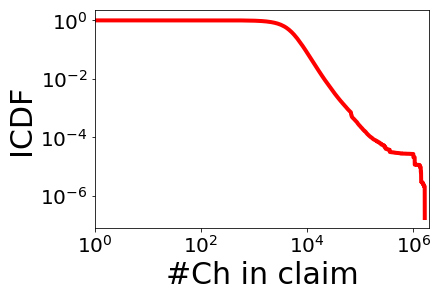

In [85]:
#Inverse cumulative density funcition

def plot_claim_length_per_app_icdf(count):
    plt.clf()
    ax = plt.subplot(111)
    ax.loglog(range(len(count)), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#Ch in claim', fontsize=30)
    ax.tick_params(labelsize=20)
    ax.set_xlim(1,2000000)
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
    
#Computing ICDF

print("maximum characters in claims in an application",max(list(app_text_claim_dict.values())))
print("Number of unique applications:", len(list(app_text_claim_dict.keys())))
count = icdf(app_text_claim_dict)
    
plot_claim_length_per_app_icdf(count)

In [86]:
def compute_app_claim_text_filing_years(main_app_date_dict,peds_status_dict,app_text_claim_dict):
    
    
    iss_claim_text_year = [0]*18
    abn_claim_text_year = [0]*18
    num_abn = [0]*18
    num_iss = [0]*18
    
    
    for i in main_app_date_dict:
        
        appid = i
        
        if appid in peds_status_dict: 
        #if appid not in mismatch: 
            d = datetime.strptime(main_app_date_dict[appid], "%Y%m%d").year
            d = d - 2000
            yr = d%20 # we have till 2018
            
            
            status = peds_status_dict[appid]
            
            if status == "ISS":
                num_claim = app_text_claim_dict[appid]
                iss_claim_text_year[yr-1] =iss_claim_text_year[yr-1] + num_claim
                num_iss[yr-1]=num_iss[yr-1]+1
                
                
            if status == "ABN":
            
                num_claim = app_text_claim_dict[appid]
                abn_claim_text_year[yr-1] = abn_claim_text_year[yr-1] + num_claim
                num_abn[yr-1]=num_abn[yr-1]+1
       
        
    return iss_claim_text_year, abn_claim_text_year, num_iss, num_abn 

In [87]:
iss_claim_text_year, abn_claim_text_year, num_iss, num_abn = compute_app_claim_text_filing_years(main_app_date_dict,peds_status_dict,app_text_claim_dict)

In [88]:
print(iss_claim_text_year)
print(abn_claim_text_year)
print(num_iss)
print(sum(num_iss))
print(num_abn)
print(sum(num_abn))

[1103793605, 1177519336, 1212933553, 1153935106, 1026067781, 1057501194, 1084148552, 1076434712, 1044831812, 1103045380, 1180266200, 1280737671, 1341246987, 1346419317, 1289582257, 1102199898, 757775576, 257563777]
[371882530, 466239971, 541017774, 578443044, 571769054, 610429435, 576516626, 511064725, 440309184, 442398855, 466356817, 476166460, 492899672, 452560067, 357746935, 243019867, 120484854, 27719074]
[155155, 171297, 194276, 190798, 187151, 194294, 202374, 204590, 198008, 208655, 225610, 243854, 255144, 256675, 244583, 206433, 142083, 48601]
3529581
[62252, 73656, 97956, 109463, 119587, 127941, 124048, 110591, 96415, 97033, 103098, 103857, 106051, 97319, 78182, 53974, 27201, 6372]
1594996


In [80]:
iss_claim_text_year = [1103793605, 1177519336, 1212933553, 1153935106, 1026067781, 1057501194, 1084148552, 1076434712, 1044831812, 1103045380, 1180266200, 1280737671, 1341246987, 1346419317, 1289582257, 1102199898, 757775576, 257563777]
abn_claim_text_year = [371882530, 466239971, 541017774, 578443044, 571769054, 610429435, 576516626, 511064725, 440309184, 442398855, 466356817, 476166460, 492899672, 452560067, 357746935, 243019867, 120484854, 27719074]

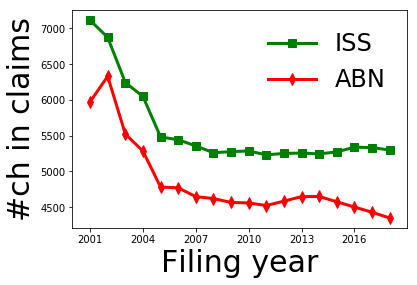

In [89]:
def plot_app_claim_text_per_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='ABN')
    ax.set_ylabel('#ch in claims', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_claim_text_year, num_iss)
X, Y2 = normalize_year19(abn_claim_text_year, num_abn)
plot_app_claim_text_per_filing_year(X,Y1,Y2)

In [ ]:
# Avergae text length per claim

In [90]:
# check claim distribution 
def avg_length_claim_per_app(df, app_text_claim_dict):
    '''
    Given input dataframe it gives a dictionary with avg characters of claims
    '''
    app_avgtext_claim_dict = dict()
    app_indclaim_dict, app_depclaim_dict = num_claim_per_app(df)
   
    
    for i in app_text_claim_dict:
        appid = i
        
        claim_text = app_text_claim_dict[i]
        
        if app_indclaim_dict[appid]!=0:
            app_avgtext_claim_dict[appid] = claim_text/(app_indclaim_dict[appid]+app_depclaim_dict[appid])
        
        
        
    return app_avgtext_claim_dict

In [92]:
app_avgtext_claim_dict = avg_length_claim_per_app(claim_par_df,app_text_claim_dict)

In [93]:
#Inverse cumulative density funcition

def plot_claim_avglength_per_app_icdf(count):
    plt.clf()
    ax = plt.subplot(111)
    ax.loglog(range(len(count)), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#Ch in claim', fontsize=30)
    ax.tick_params(labelsize=20)
    ax.set_xlim(1,2000000)
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()
    
#Computing ICDF

print("maximum characters in claims in an application",max(list(app_avgtext_claim_dict.values())))
print("Number of unique applications:", len(list(app_avgtext_claim_dict.keys())))
count = icdf(app_avgtext_claim_dict)
    
plot_claim_avglength_per_app_icdf(count)

maximum characters in claims in an application 86350.0
Number of unique applications: 5894006


TypeError: 'float' object cannot be interpreted as an integer

In [100]:
def compute_app_claim_avgtext_filing_years(main_app_date_dict,peds_status_dict,app_avgtext_claim_dict):
    
    
    iss_claim_text_year = [0]*18
    abn_claim_text_year = [0]*18
    num_abn = [0]*18
    num_iss = [0]*18
    
    
    for i in main_app_date_dict:
        
        appid = i
        
        if appid in peds_status_dict and appid in app_avgtext_claim_dict: 
        #if appid not in mismatch: 
            d = datetime.strptime(main_app_date_dict[appid], "%Y%m%d").year
            d = d - 2000
            yr = d%20 # we have till 2018
            
            
            status = peds_status_dict[appid]
            
            if status == "ISS":
                num_claim = app_avgtext_claim_dict[appid]
                iss_claim_text_year[yr-1] =iss_claim_text_year[yr-1] + num_claim
                num_iss[yr-1]=num_iss[yr-1]+1
                
                
            if status == "ABN":
            
                num_claim = app_avgtext_claim_dict[appid]
                abn_claim_text_year[yr-1] = abn_claim_text_year[yr-1] + num_claim
                num_abn[yr-1]=num_abn[yr-1]+1
       
        
    return iss_claim_text_year, abn_claim_text_year, num_iss, num_abn 

In [101]:
iss_claim_avgtext_year, abn_claim_avgtext_year, num_iss, num_abn = compute_app_claim_avgtext_filing_years(main_app_date_dict,peds_status_dict,app_avgtext_claim_dict)

In [102]:
print(iss_claim_avgtext_year)
print(abn_claim_avgtext_year)
print(num_iss)
print(sum(num_iss))
print(num_abn)
print(sum(num_abn))

[46211966.83855853, 50776577.432697, 56924227.68935147, 55855130.259653755, 55803031.408787966, 58023372.324791126, 61511209.87203849, 63540426.27875361, 62621433.53210726, 66450601.87863116, 71461994.80166613, 77427542.85966931, 81023091.26170082, 82018535.46372893, 79563314.17913444, 69585046.96657605, 48820574.78829107, 17270786.446321294]
[16954496.25952383, 21143055.081294272, 25964712.72943045, 29202252.5201737, 31869206.353513226, 34539306.504237704, 34323769.81849566, 31455617.623477995, 27775910.41005751, 27977254.20430265, 29770134.277287137, 30414346.919843726, 30916799.989382315, 28789772.420454293, 23614967.07868566, 16770050.879926872, 8849360.286284504, 2325394.2893753177]
[155144, 171287, 194263, 190783, 187140, 194279, 202359, 204573, 197984, 208636, 225596, 243831, 255125, 256652, 244559, 206418, 142069, 48599]
3529297
[62237, 73638, 97926, 109431, 119553, 127909, 124009, 110565, 96387, 97001, 103070, 103827, 106030, 97291, 78165, 53953, 27185, 6371]
1594548


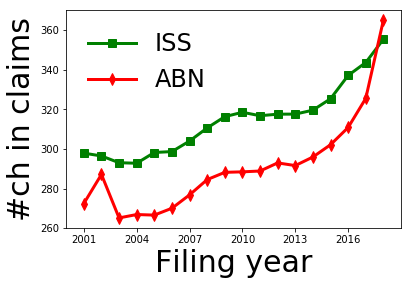

In [103]:
def plot_app_claim_avgtext_per_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='ABN')
    ax.set_ylabel('#ch in claims', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_claim_avgtext_year, num_iss)
X, Y2 = normalize_year19(abn_claim_avgtext_year, num_abn)
plot_app_claim_avgtext_per_filing_year(X,Y1,Y2)

In [ ]:
random_claim_similarities_n200.csv

In [ ]:
## Embedding

In [23]:
df_tot_sim = pd.read_csv("/kellogg/proj/smz6657/random_claim_similarities_n100.csv",sep =';')

In [24]:
df_tot_sim.head()

,pat_id,similarities
0,A15529463,"[('A15529463', 0.9999999403953552), ('G9495444..."
1,A15092889,"[('A15092889', 1.0), ('G9354510', 0.8187348246..."
2,A15620253,"[('A15620253', 1.0), ('A15051973', 0.897414624..."
3,G5931484,"[('G5931484', 1.0), ('G4349178', 0.75109362602..."
4,G7045648,"[('G7045648', 1.0), ('G6214793', 0.75755804777..."


In [25]:
df_patent=pd.read_csv('/kellogg/proj/smz6657/grant_data/patent.tsv', sep ='\t')

/software/anaconda3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
df_pat = df_patent.loc[(df_patent.type == "utility") & (df_patent.country == "US")]

In [27]:
del df_patent

In [28]:
#dropping unnecessary columns
df_pat.drop(["id" ,"type","country","kind","filename","withdrawn"], axis = 1, inplace = True) 

In [29]:
df_pat.head()

,number,date,abstract,title,num_claims
0,10000000,2018-06-19,A frequency modulated (coherent) laser detecti...,Coherent LADAR using intra-pixel quadrature de...,20.0
1,10000001,2018-06-19,The injection molding machine includes a fixed...,Injection molding machine and mold thickness c...,12.0
2,10000002,2018-06-19,The present invention relates to: a method for...,Method for manufacturing polymer film and co-e...,9.0
3,10000003,2018-06-19,The invention relates to a method for producin...,Method for producing a container from a thermo...,18.0
4,10000004,2018-06-19,The present invention relates to provides a do...,"Process of obtaining a double-oriented film, c...",6.0


In [30]:
#id-date dictionary
def create_pat_date_dict(df):
    '''This makes dictionary with only the patents that are granted'''
    
    app_id_ls = list(df['number'].apply(str))
    app_date_ls = list(df['date'].apply(str))
    app_date_dict = dict()
    
    for i in range(0,len(app_id_ls)):
        appid = app_id_ls[i]
        date = app_date_ls[i]
        
       
        if date!= "nan":
            d = datetime.strptime(date, "%Y-%m-%d").year
            app_date_dict[appid] = date 
              
    return app_date_dict

In [31]:
pat_date_dict = create_pat_date_dict(df_pat)

In [32]:
print(len(pat_date_dict))

6426469


In [33]:
df_tot_sim.head()

,pat_id,similarities
0,A15529463,"[('A15529463', 0.9999999403953552), ('G9495444..."
1,A15092889,"[('A15092889', 1.0), ('G9354510', 0.8187348246..."
2,A15620253,"[('A15620253', 1.0), ('A15051973', 0.897414624..."
3,G5931484,"[('G5931484', 1.0), ('G4349178', 0.75109362602..."
4,G7045648,"[('G7045648', 1.0), ('G6214793', 0.75755804777..."


In [72]:
def create_clean_dict_sim(df):
    
    app_pat_id = list(df['pat_id'].apply(str))
    embed= list(df['similarities'].apply(str))
    #print(len)
    clean = dict()
    
    for i in range(0, len(app_pat_id)):
        mod_appid = app_pat_id[i]
        new_str = embed[i][1:-1]
        em =  new_str.split("),")
        count = 0
        list_of_fr =[]
        for x in em:
                if count == 0:
                    count= count+1
                    continue
                y = x.split(",")
                #print(y[0])
                ids = y[0][3:-1]
                #print(ids)
                #print(y[1])
                if count == len(em)-1:
                    dis = float(y[1][:-1])
                else:
                    count= count+1
                    dis = float(y[1])
                #print(dis)
                fr = [ids, dis]
                list_of_fr.append(fr)
    
        clean[mod_appid] = list_of_fr
    return clean
    

In [73]:
sim_dict = create_clean_dict_sim(df_tot_sim)

In [65]:
print(len(sim_dict))

2461998


In [74]:
print(len(pat_date_dict))

6426469


In [75]:
print(len( main_app_date_dict))

5695616


In [79]:
def create_embed_dict_clean(sim_dict, main_app_date_dict, pat_date_dict, NN):
     
    friends_dict = dict()
    #ccccc= 0
    for i in sim_dict:
        #ccccc+=1
        mod_appid = i
        list_friends = sim_dict[i]
        
        appid = mod_appid[1:]
        sim_list =[]
        
        if appid in main_app_date_dict:
            app_date = main_app_date_dict[appid]
    
            fr_count =0
        
            for x in list_friends:
                ids = x[0]
                dis = x[1]
                if "A" in ids:
                    #print(ids)
                    nid = ids[1:]
                    #print(nid)
                    if nid in main_app_date_dict:
                        napp_date = main_app_date_dict[nid]
                        #print("here", napp_date)
                        if compare_app_date(app_date, napp_date):
                            fr_count = fr_count+1
                            sim_list.append(dis)
                            
                if "G" in ids:
                    #print(ids)
                    nid = ids[1:]
                    #print(nid)
                    if nid in pat_date_dict:
                        napp_date = pat_date_dict[nid]
                        #print("heregrant", napp_date)
                        if compare_app_pat_date(app_date, napp_date):
                            fr_count = fr_count+1
                            sim_list.append(dis)     
                if fr_count >= NN:
                    friends_dict[appid] = sim_list
                    break
            #compare the dates
            
        #if ccccc>5:
            #break
        
    return friends_dict

In [187]:
#friends_dict = create_embed_dict(df_tot_sim, main_app_date_dict, pat_date_dict, 30)

In [80]:
friends_dict = create_embed_dict_clean(sim_dict, main_app_date_dict, pat_date_dict, 30)

In [81]:
print(len(friends_dict))

854634


In [82]:
#test
count =0
for i in friends_dict:
    print(i, ":", friends_dict[i], sum(friends_dict[i]))
    count= count+1
    if count == 10:
        break

15529463 : [0.7723225355148315, 0.7601281404495239, 0.7534289956092834, 0.7456469535827637, 0.7426819801330566, 0.7414558529853821, 0.7410765290260315, 0.7385962009429932, 0.73395174741745, 0.7329892516136169, 0.7316779494285583, 0.7313675284385681, 0.7309477925300598, 0.7272037267684937, 0.7264599204063416, 0.7251099348068237, 0.7250932455062866, 0.723628580570221, 0.7213549613952637, 0.720509946346283, 0.7181572318077087, 0.717903733253479, 0.7175100445747375, 0.7127719521522522, 0.7121212482452393, 0.711354672908783, 0.7110413312911987, 0.7108346819877625, 0.7080350518226624, 0.7077142000198364] 21.853075921535492
15092889 : [0.8108808398246765, 0.7854385375976562, 0.7778022885322571, 0.7654565572738647, 0.7631062269210815, 0.7588691711425781, 0.7497870922088623, 0.7465158700942993, 0.741114616394043, 0.7310147285461426, 0.7275965809822083, 0.7182172536849976, 0.7182116508483887, 0.7175405621528625, 0.7158774733543396, 0.7147470712661743, 0.710210919380188, 0.7089407444000244, 0.707

In [83]:
# we compute the simlarity
def compute_sim_iss_abn_years(main_app_date_dict, peds_status_dict, friends_dict):
    
    
    iss_sim_year = [0]*18
    abn_sim_year = [0]*18
    num_abn = [0]*18
    num_iss = [0]*18
    
    
    for i in main_app_date_dict:
        
        appid = i
        
        if appid in peds_status_dict and appid in friends_dict: 
        #if appid not in mismatch: 
            d = datetime.strptime(main_app_date_dict[appid], "%Y%m%d").year
            d = d - 2000
            yr = d%20 # we have till 2018
            
            
            status = peds_status_dict[appid]
            
            if status == "ISS":
                #print(friends_dict[appid])
                sum_sim = sum(float(i) for i in friends_dict[appid])
                sim = sum_sim/len(friends_dict[appid])
                iss_sim_year[yr-1] = iss_sim_year[yr-1] + sim
                num_iss[yr-1]=num_iss[yr-1]+1
                
                
            if status == "ABN":
                sum_sim = sum(float(i) for i in friends_dict[appid])
                sim = sum_sim/len(friends_dict[appid])
                abn_sim_year[yr-1] = abn_sim_year[yr-1] + sim
                num_abn[yr-1]=num_abn[yr-1]+1
       

        
    return iss_sim_year, abn_sim_year,  num_iss, num_abn

In [84]:
iss_sim_year, abn_sim_year,  num_iss, num_abn = compute_sim_iss_abn_years(main_app_date_dict, peds_status_dict, friends_dict)

In [85]:
print(iss_sim_year)
print( abn_sim_year)
print( num_iss)
print(num_abn)

[7570.125415114602, 9534.501998531892, 10949.492769024762, 11279.47009718412, 12283.80585282251, 14140.59211223124, 16568.26544983779, 18693.476255637415, 19875.078641045253, 22961.617002393756, 26760.103441836472, 30906.784412467503, 34180.85636261923, 35861.429985145754, 34548.50150342116, 29314.369319285863, 20518.470458410087, 7117.193731339774]
[2658.733926930032, 4047.9628427306857, 5702.59309287668, 7245.2927802701815, 8528.27035688163, 10314.938319979165, 11271.232098986651, 11067.473550687297, 10478.195415111319, 11185.4016423007, 12758.753329720164, 13531.02251934409, 14406.00922770497, 13524.41005163989, 11095.758642377508, 7601.747666166196, 3934.125250087182, 906.9583378096419]
[10845, 13645, 15669, 16146, 17568, 20210, 23635, 26649, 28280, 32625, 37953, 43758, 48249, 50454, 48433, 40966, 28513, 9831]
[3821, 5751, 8163, 10385, 12226, 14771, 16102, 15801, 14930, 15931, 18167, 19225, 20418, 19111, 15651, 10702, 5514, 1258]


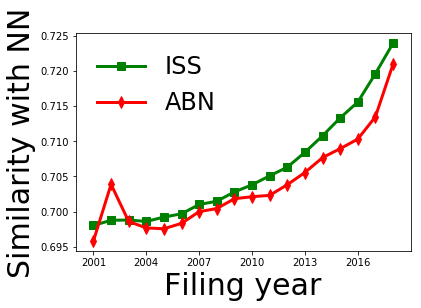

In [86]:
def plot_sim_iss_abn_filing_year(X,Y1,Y2):
    plt.clf()
    ax = plt.subplot(111)
    plt.plot(X, Y1, '-gs', linewidth=3, markersize=8, label='ISS')
    plt.plot(X, Y2, '-rd', linewidth=3, markersize=8, label='ABN')
    ax.set_ylabel('Similarity with NN', fontsize=30)
    ax.set_xlabel('Filing year', fontsize=30)
    plt.legend(loc='best', frameon=0, fontsize=24)
    plt.xlim(xmax = 2019, xmin = 2000)
    #plt.ylim(ymax =20, ymin = 15)
    plt.xticks(np.arange(2001, 2019, 3))
    #plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    plt.show()

X, Y1 = normalize_year19(iss_sim_year, num_iss)
X, Y2 = normalize_year19(abn_sim_year, num_abn)
plot_sim_iss_abn_filing_year(X,Y1,Y2)

In [167]:
def create_embed_dict(df, main_app_date_dict, pat_date_dict, NN):
    
    app_pat_id = list(df['pat_id'].apply(str))
    embed= list(df['similarities'].apply(str))
    
    friends_dict = dict()
    
    for i in range(0, len(app_pat_id)):
        mod_appid = app_pat_id[i]
        new_str = embed[i][1:-1]
        #print(new_str)
        em =  new_str.split("),")
        #embed_dict[appid] = em
        #print(em)
        appid = mod_appid[1:]
        sim_list =[]
        if appid in main_app_date_dict:
            app_date = main_app_date_dict[appid]
            count = 0
            fr_count =0
            for x in em:
                if count == 0:
                    count= count+1
                    continue
                y = x.split(",")
                ids = y[0][2:]
                
                if count == len(em)-1:
                    dis = y[1][:-1]
                else:
                    count= count+1
                    dis = float(y[1])
                #print(ids,":", dis)
                
                if "A" in ids:
                    nid = ids[2:-1]
                    #print(nid)
                    if nid in main_app_date_dict:
                        napp_date = main_app_date_dict[nid]
                        #print("here", napp_date)
                        if compare_app_date(app_date, napp_date):
                            fr_count = fr_count+1
                            sim_list.append(dis)
                            
                if "G" in ids:
                    nid = ids[2:-1]
                    if nid in pat_date_dict:
                        napp_date = pat_date_dict[nid]
                        #print("heregrant", napp_date)
                        if compare_app_pat_date(app_date, napp_date):
                            fr_count = fr_count+1
                            sim_list.append(dis)     
                if fr_count >= NN:
                    friends_dict[appid] = sim_list
                    break
            #compare the dates
            
                
        
    return friends_dict